In [ ]:
# Criteria Meets Expectations
# Completion 
#             ● Every feature is investigated using either histograms, bi-plots, or
#             other visual and numeric means.
#             ● Pearson correlation coefficients and other statistical methods were
#             used to identify statistical relationship strengths.
# Process and understanding
#             ● The submission shows that the student understands how to explore
#             feature relationships in the data.
#             ● The submission demonstrates that the student made
#             data-supported decisions on when to select specific features.
# Presentation 
#             ● Jupyter Notebook is submitted with all the applied code steps in
#             working order and with notation or comments as needed.
#             ● The submission is complete and uploaded in full to the Github repo.

In [1]:
# Importing librosa, soundfile, pandas, os, glob, pickle, numpy, matplotlib, seaborn and warnings in the lines below
import librosa
import librosa.display
import soundfile
import pandas as pd
import os, glob, pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from dotenv import load_dotenv, find_dotenv

import warnings

# Suppress specific FutureWarnings related to seaborn and pandas
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

load_dotenv()
sound_path = os.getenv('audio_path')

## Exploring the dataframe<a id='Exploring_the_dataframe'></a>

In [3]:
# data = pd.read_csv('voice_data_dw.csv')    # normal data, dw = data wrangling
data = pd.read_csv('voice_data_no_trim.csv')     # test data
df = pd.DataFrame(data)
df.head()

filename  modality  vocal_channel  emotion  \
0  03-01-01-01-01-01-01.wav         3              1        1   
1  03-01-01-01-01-02-01.wav         3              1        1   
2  03-01-01-01-02-01-01.wav         3              1        1   
3  03-01-01-01-02-02-01.wav         3              1        1   
4  03-01-02-01-01-01-01.wav         3              1        2   

   voice_intensity  statement  statement_repetition  actor_gender  mfcc_mean  \
0                1          1                     1             1 -13.750966   
1                1          1                     2             1 -14.013200   
2                1          2                     1             1 -13.286643   
3                1          2                     2             1 -13.380160   
4                1          1                     1             1 -14.227764   

    mfcc_max  ...   rms_std  rms_skew  rms_kurtosis  zero_cr_mean  \
0  208.77170  ...  0.002752  0.523488     -0.223807      0.071506   
1  203.44556  ...  0.003002  0.472005     -0.447499      0.063912   
2  212.63199  ...  0.003825  1.126351      0.754771      0.086652   
3  214.31924  ...  0.004013  1.583204      1.841371      0.088229   
4  217.13522  ...  0.002391  1.028021      0.677945      0.082396   

   zero_cr_max  zero_cr_min  zero_cr_median  zero_cr_std  zero_cr_skew  \
0     0.208984     0.023438        0.046875     0.049214      1.349598   
1     0.183105     0.019531        0.048340     0.042300      1.347601   
2     0.424316     0.014648        0.048340     0.091483      2.158822   
3     0.406250     0.013184        0.047852     0.093873      1.803562   
4     0.374512     0.018555        0.047852     0.076891      2.038556   

   zero_cr_kurtosis  
0          0.792986  
1          0.843776  
2          4.017514  
3          2.245144  
4          3.821344  

[5 rows x 78 columns]

In [5]:
df.iloc[:,8:].corr()

mfcc_mean  mfcc_max  mfcc_min  mfcc_median  mfcc_std  \
mfcc_mean          1.000000 -0.203439  0.616473     0.634499 -0.717556   
mfcc_max          -0.203439  1.000000 -0.467459    -0.236438  0.450106   
mfcc_min           0.616473 -0.467459  1.000000     0.077998 -0.891409   
mfcc_median        0.634499 -0.236438  0.077998     1.000000 -0.149090   
mfcc_std          -0.717556  0.450106 -0.891409    -0.149090  1.000000   
...                     ...       ...       ...          ...       ...   
zero_cr_min        0.108381 -0.485146  0.516827     0.001411 -0.470877   
zero_cr_median     0.293285 -0.605931  0.457551     0.304982 -0.573744   
zero_cr_std       -0.315417  0.011870 -0.206348    -0.183036  0.140261   
zero_cr_skew      -0.134579  0.086481  0.021625    -0.300641  0.043040   
zero_cr_kurtosis   0.001372 -0.011128  0.116362    -0.175687 -0.058732   

                  mfcc_skew  mfcc_kurtosis  mfcc_delta_mean  mfcc_delta_max  \
mfcc_mean         -0.066686      -0.045803        -0.715621       -0.526043   
mfcc_max          -0.076393       0.021634         0.046581        0.365796   
mfcc_min           0.097216      -0.084669        -0.722032       -0.947331   
mfcc_median       -0.103624       0.003809        -0.017137        0.037783   
mfcc_std          -0.059283      -0.015605         0.849981        0.796457   
...                     ...            ...              ...             ...   
zero_cr_min       -0.007703      -0.057275        -0.207340       -0.469150   
zero_cr_median     0.075745       0.093570        -0.225393       -0.325494   
zero_cr_std        0.088097       0.115866         0.217093        0.259877   
zero_cr_skew      -0.007716      -0.084001        -0.036998       -0.056743   
zero_cr_kurtosis  -0.026361      -0.100047        -0.105919       -0.137878   

                  mfcc_delta_min  ...   rms_std  rms_skew  rms_kurtosis  \
mfcc_mean               0.346535  ...  0.633422  0.011122     -0.079738   
mfcc_max               -0.700188  ... -0.538284 -0.122916     -0.074127   
mfcc_min                0.536361  ...  0.661209 -0.032103     -0.097223   
mfcc_median             0.323609  ...  0.339977  0.074899     -0.001354   
mfcc_std               -0.534967  ... -0.759091  0.025119      0.127334   
...                          ...  ...       ...       ...           ...   
zero_cr_min             0.508974  ...  0.447825 -0.084806     -0.126550   
zero_cr_median          0.622423  ...  0.615146  0.083273     -0.045589   
zero_cr_std            -0.075192  ... -0.120456  0.022662      0.008777   
zero_cr_skew           -0.124061  ... -0.092144 -0.106333     -0.036117   
zero_cr_kurtosis       -0.014418  ...  0.034508 -0.093716     -0.033430   

                  zero_cr_mean  zero_cr_max  zero_cr_min  zero_cr_median  \
mfcc_mean            -0.063482    -0.250391     0.108381        0.293285   
mfcc_max             -0.388472    -0.095690    -0.485146       -0.605931   
mfcc_min              0.132118    -0.089179     0.516827        0.457551   
mfcc_median           0.078109    -0.176571     0.001411        0.304982   
mfcc_std             -0.251403     0.029020    -0.470877       -0.573744   
...                        ...          ...          ...             ...   
zero_cr_min           0.422131     0.039693     1.000000        0.630290   
zero_cr_median        0.694063     0.130846     0.630290        1.000000   
zero_cr_std           0.719101     0.939697    -0.051113        0.050129   
zero_cr_skew         -0.083779     0.536389    -0.064885       -0.304695   
zero_cr_kurtosis     -0.180138     0.367298    -0.018275       -0.195190   

                  zero_cr_std  zero_cr_skew  zero_cr_kurtosis  
mfcc_mean           -0.315417     -0.134579          0.001372  
mfcc_max             0.011870      0.086481         -0.011128  
mfcc_min            -0.206348      0.021625          0.116362  
mfcc_median         -0.183036     -0.300641         -0.175687  
mfcc_std             0.140261      0.043040   

### Strong vs normal emotion<a id='Strong_vs_normal_emotion'></a>

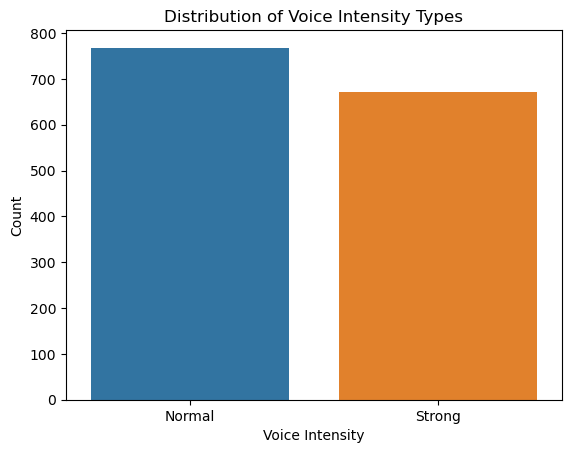

In [4]:
# Replace 1 and 2 with 'Normal' and 'Strong' in the 'voice_intensity' column
# df['voice_intensity'] = df['voice_intensity'].replace({1: 'Normal', 2: 'Strong'})

# Create a count plot
sns.countplot(x='voice_intensity', data=df)

# Adding labels and title for clarity
plt.xlabel('Voice Intensity')
plt.ylabel('Count')
plt.title('Distribution of Voice Intensity Types')
plt.xticks([0, 1], ['Normal', 'Strong'])

# Display the plot
plt.show()

### Number of repeated phrases<a id='Number_of_repeated_phrases'></a>

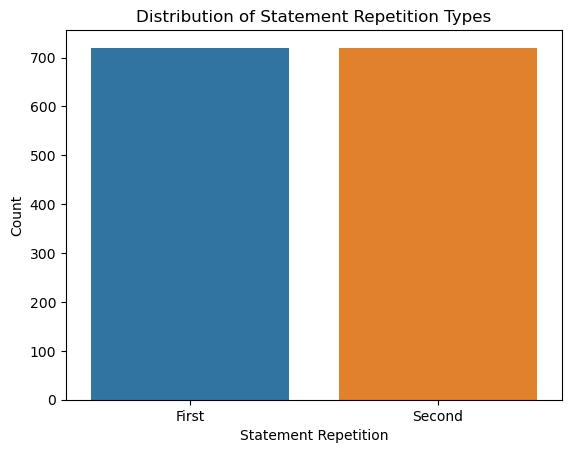

In [6]:
# Replace 1 and 2 with 'First' and 'Second' in the 'statement_repetition' column
# df['statement_repetition'] = df['statement_repetition'].replace({1: 'First', 2: 'Second'})

# Create a count plot
sns.countplot(x='statement_repetition', data=df)

# Adding labels and title for clarity
plt.xlabel('Statement Repetition')
plt.ylabel('Count')
plt.title('Distribution of Statement Repetition Types')
plt.xticks([0, 1], ['First', 'Second'])

# Display the plot
plt.show()


### Number of Male vs Female actors<a id='Number_of_Male_vs_Female_actors'></a>

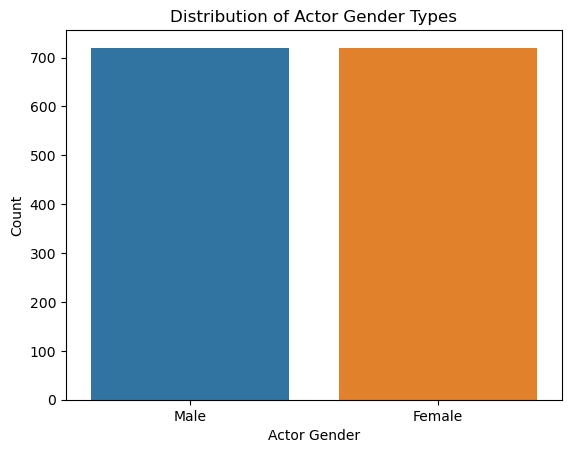

In [7]:
# Replace 1 and 2 with 'Male' and 'Female' in the 'actor_gender' column
# df['actor_gender'] = df['actor_gender'].replace({1: 'Male', 2: 'Female'})

# Create a count plot
sns.countplot(x='actor_gender', data=df)

# Adding labels and title for clarity
plt.xlabel('Actor Gender')
plt.ylabel('Count')
plt.title('Distribution of Actor Gender Types')
plt.xticks([0, 1], ['Male', 'Female'])

# Display the plot
plt.show()

### Emotions

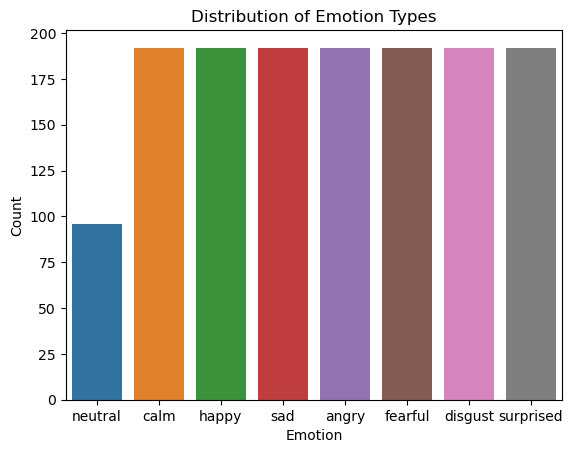

In [8]:
# Create a count plot
sns.countplot(x='emotion', data=df)

# Adding labels and title for clarity
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotion Types')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised'])

# Display the plot
plt.show()

In [9]:
# Considering dropping this column due to imbalance of data.
neutral = df[df['emotion'] == 1].sum
print(neutral)

<bound method NDFrame._add_numeric_operations.<locals>.sum of                       filename  modality  vocal_channel  emotion  \
0     03-01-01-01-01-01-01.wav         3              1        1   
1     03-01-01-01-01-02-01.wav         3              1        1   
2     03-01-01-01-02-01-01.wav         3              1        1   
3     03-01-01-01-02-02-01.wav         3              1        1   
60    03-01-01-01-01-01-02.wav         3              1        1   
...                        ...       ...            ...      ...   
1323  03-01-01-01-02-02-23.wav         3              1        1   
1380  03-01-01-01-01-01-24.wav         3              1        1   
1381  03-01-01-01-01-02-24.wav         3              1        1   
1382  03-01-01-01-02-01-24.wav         3              1        1   
1383  03-01-01-01-02-02-24.wav         3              1        1   

      voice_intensity  statement  statement_repetition  actor_gender  \
0                   1          1                 

### Statements

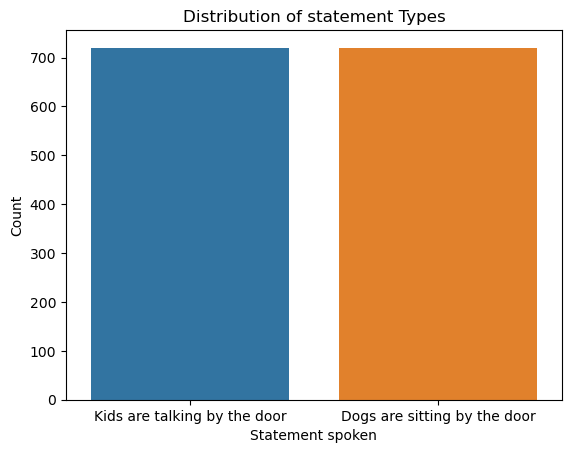

In [10]:
# Create a count plot
sns.countplot(x='statement', data=df)

# Adding labels and title for clarity
plt.xlabel('Statement spoken')
plt.ylabel('Count')
plt.title('Distribution of statement Types')
plt.xticks([0, 1], ["Kids are talking by the door", "Dogs are sitting by the door"])

# Display the plot
plt.show()

### Distributions Of Feature Values<a id='Distributions_Of_Feature_Values'></a>

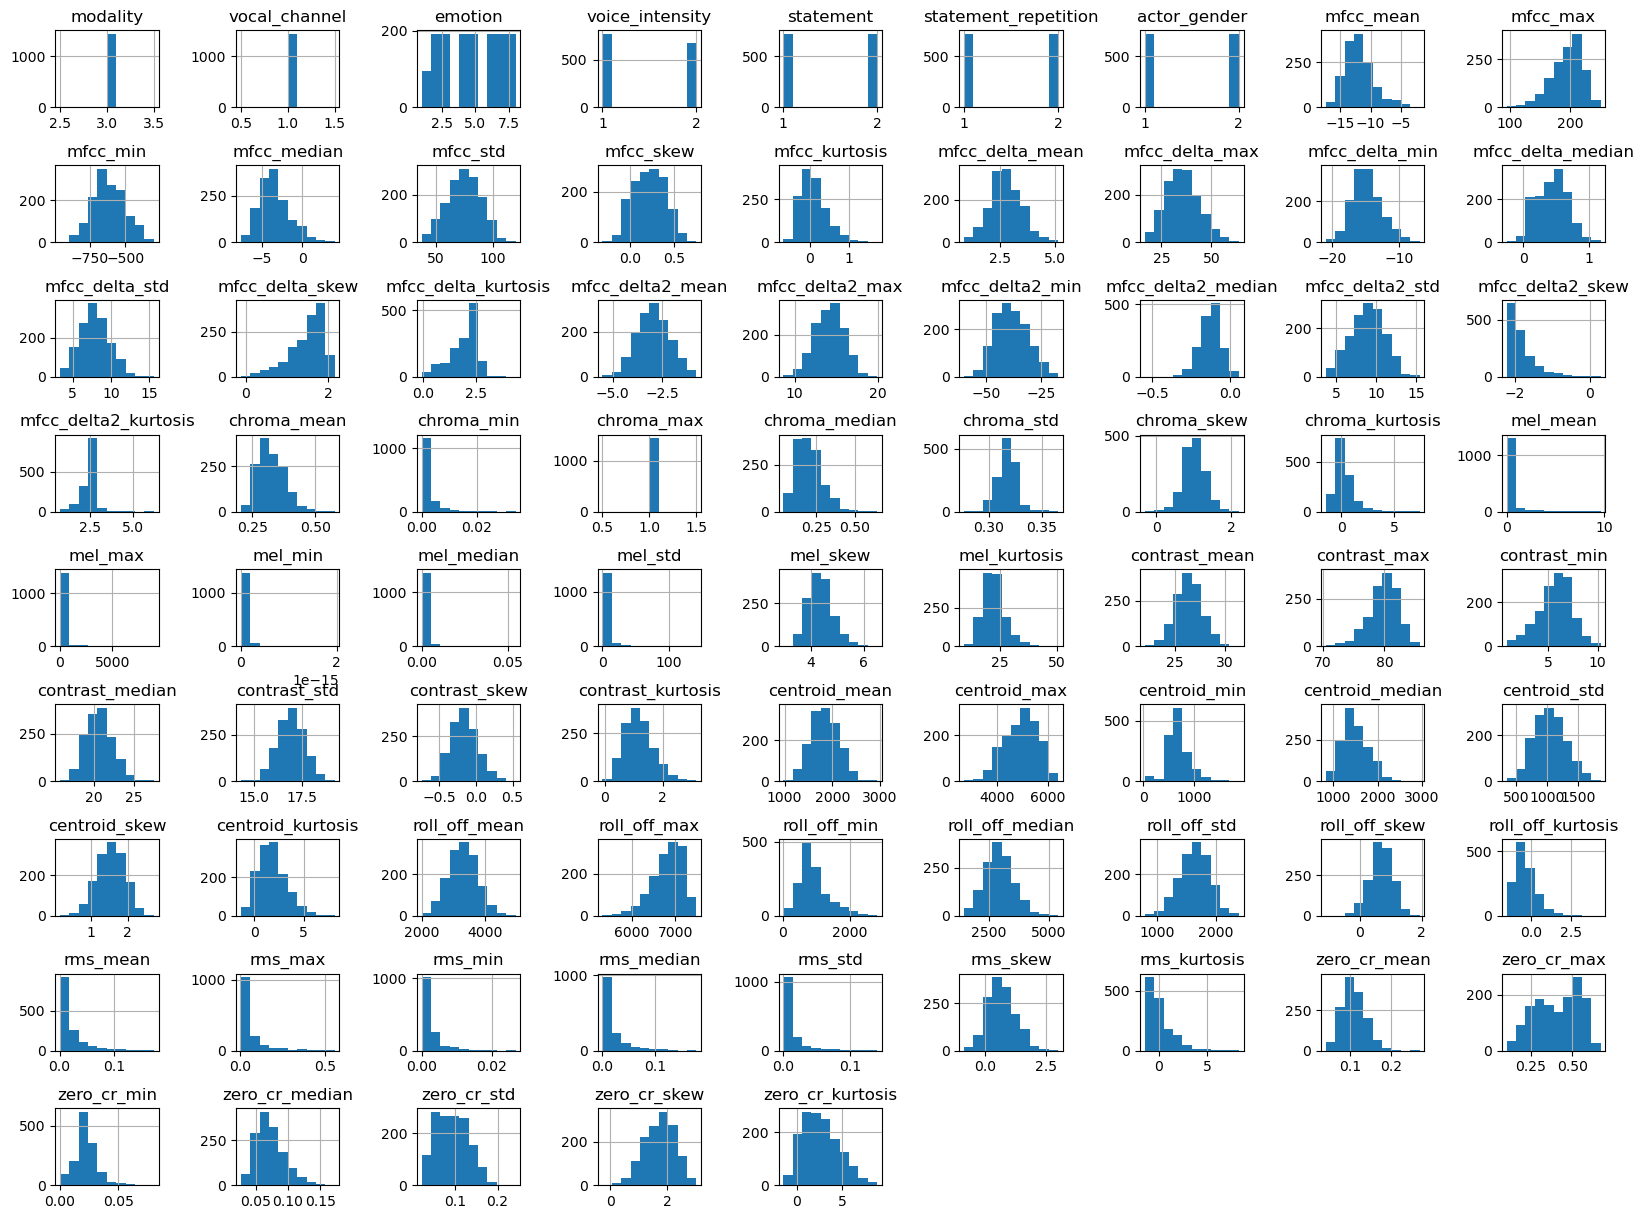

In [11]:
df.hist(figsize=(20,15))
plt.subplots_adjust(hspace=0.75, wspace=0.75);

### Investigating relationships with pairplot

In [ ]:
# Pairplot of the voice data
sns.pairplot(df.iloc[:,8:])
plt.show()

### Heatmap

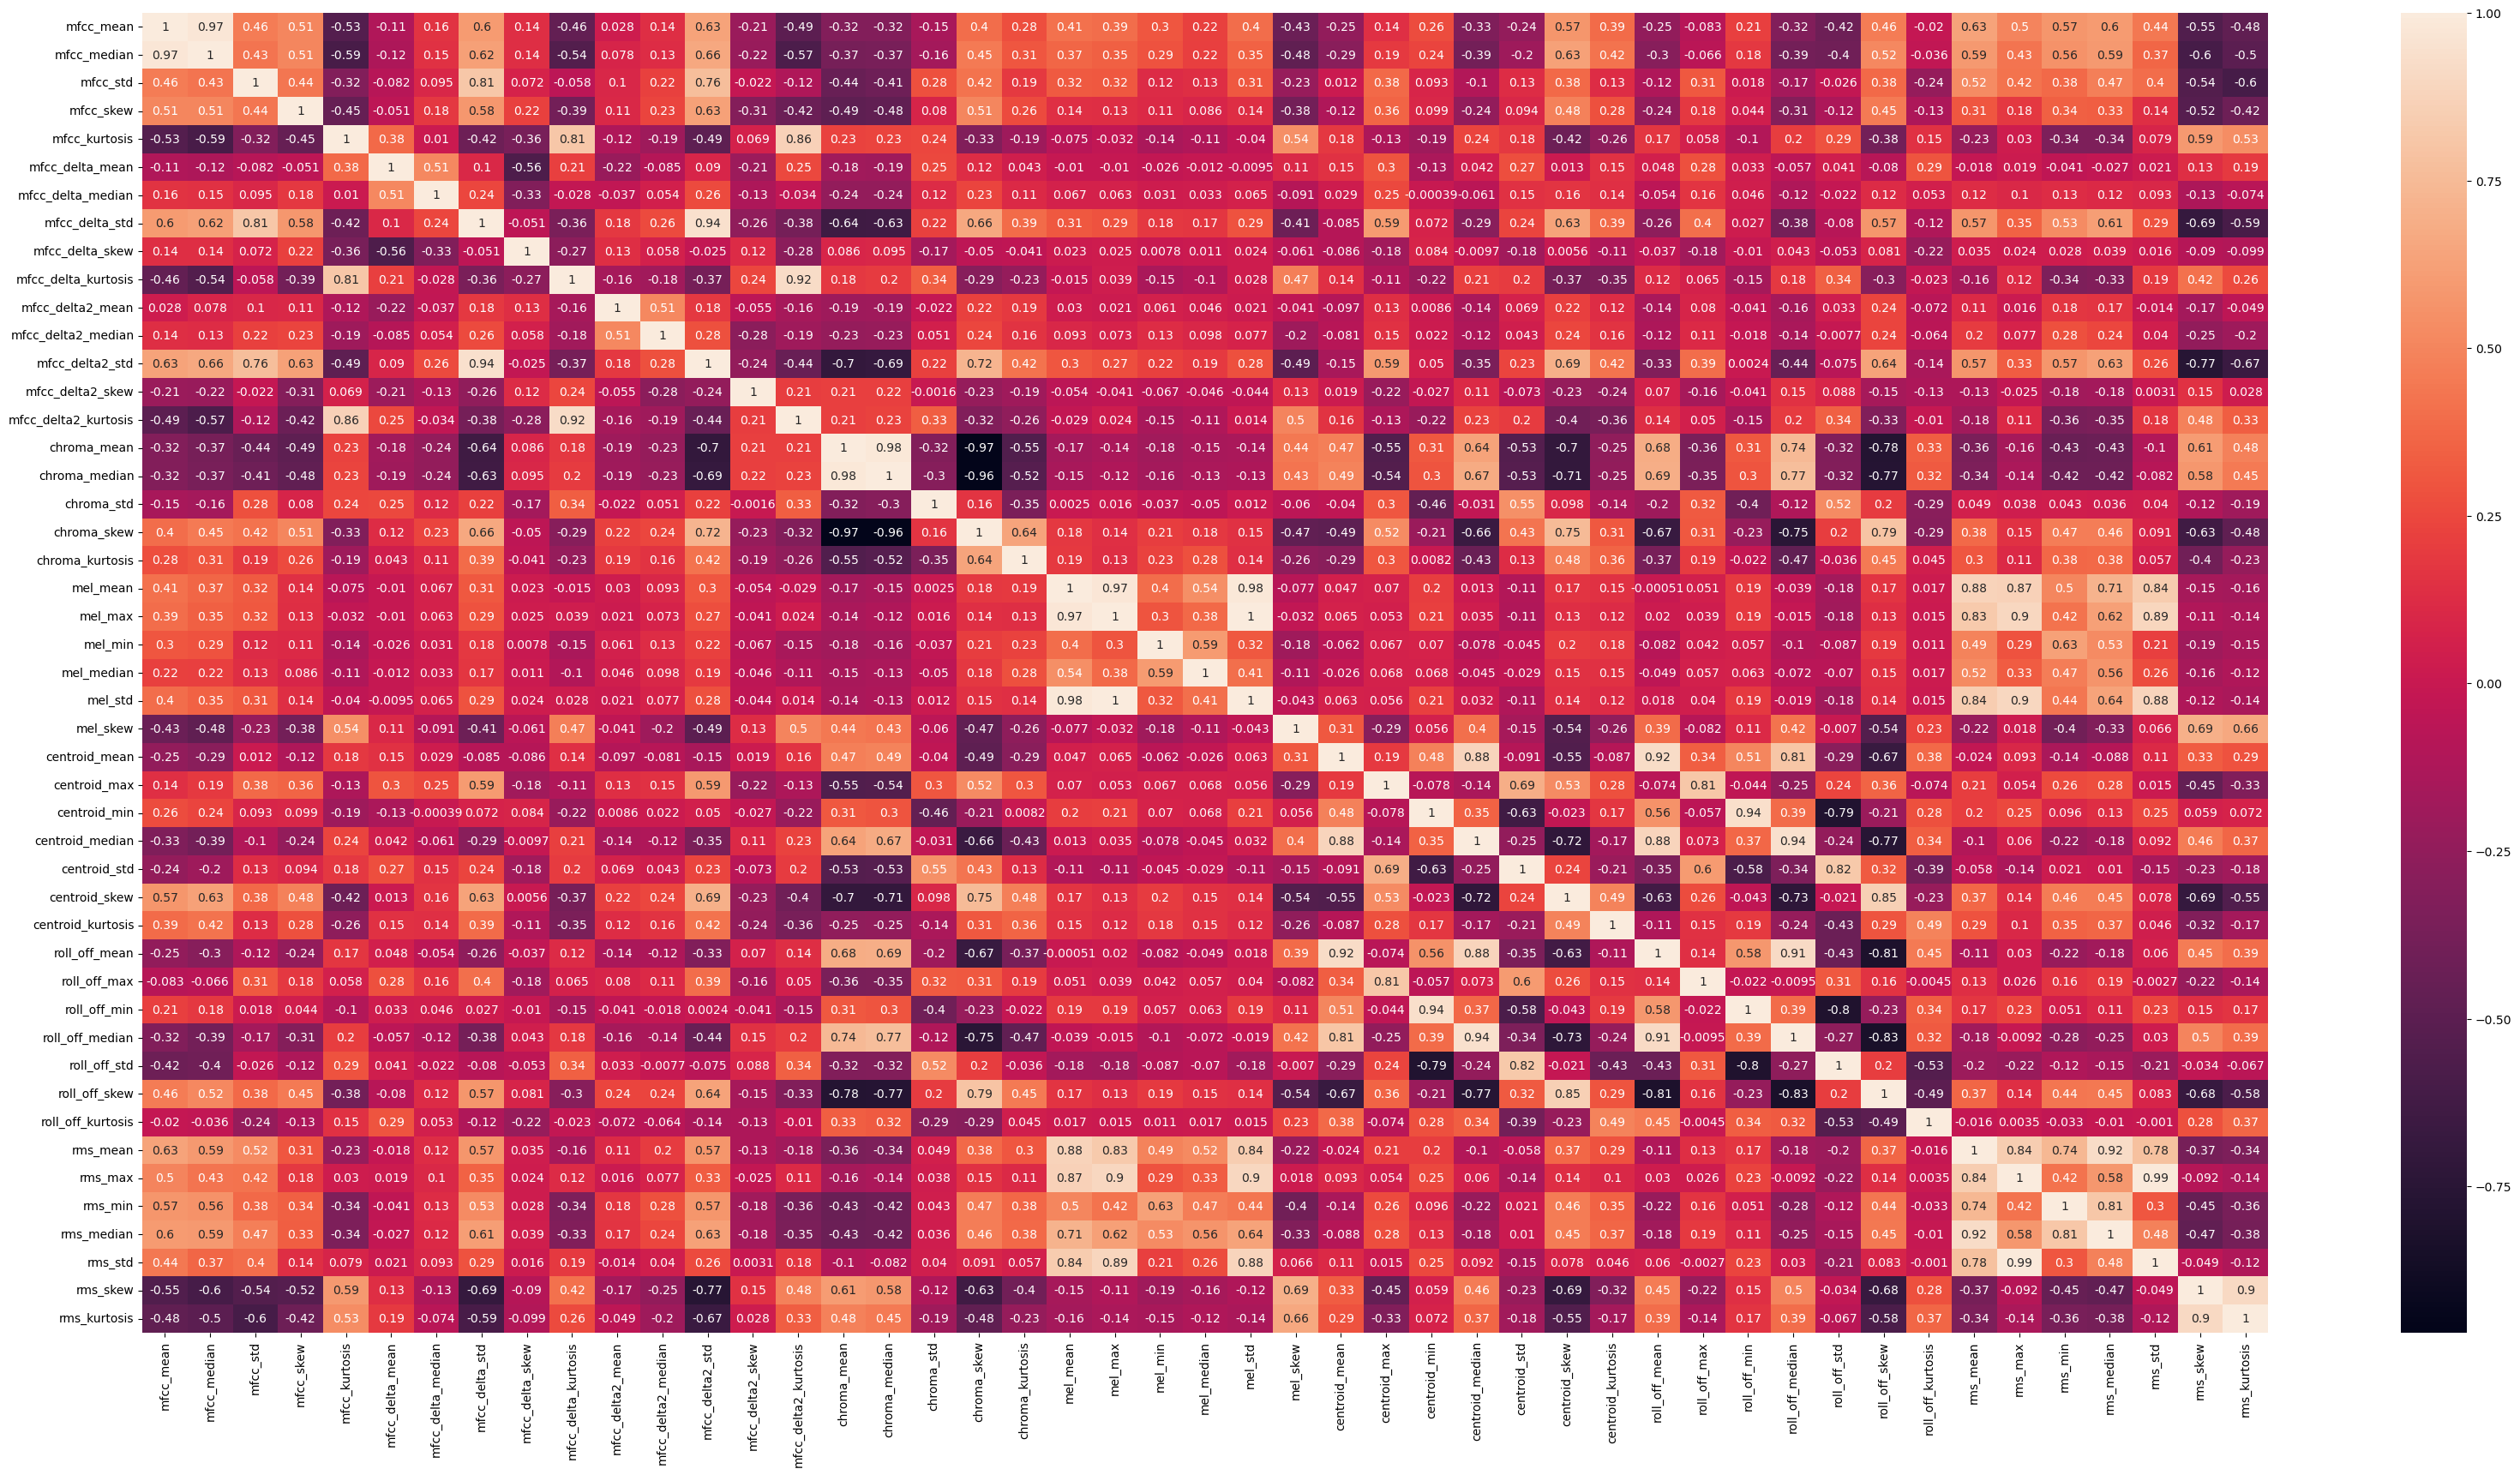

In [8]:
# Make a heatmap of the data
plt.figure(figsize=(40,20))
sns.heatmap(df.iloc[:,8:].corr(), annot=True)
plt.show()

### KNN

In [6]:
# data = pd.read_csv('voice_data_dw.csv')    # normal data, dw = data wrangling
data = pd.read_csv('voice_data_no_trim.csv')     # test data
df = pd.DataFrame(data)
df.head()

filename  modality  vocal_channel  emotion  \
0  03-01-01-01-01-01-01.wav         3              1        1   
1  03-01-01-01-01-02-01.wav         3              1        1   
2  03-01-01-01-02-01-01.wav         3              1        1   
3  03-01-01-01-02-02-01.wav         3              1        1   
4  03-01-02-01-01-01-01.wav         3              1        2   

   voice_intensity  statement  statement_repetition  actor_gender  mfcc_mean  \
0                1          1                     1             1 -13.957471   
1                1          1                     2             1 -14.089418   
2                1          2                     1             1 -13.454927   
3                1          2                     2             1 -13.550830   
4                1          1                     1             1 -14.393763   

    mfcc_max  ...   rms_std  rms_skew  rms_kurtosis  zero_cr_mean  \
0   7.346735  ...  0.002970  0.371352     -0.322805      0.079278   
1   8.214594  ...  0.003226  0.348973     -0.500822      0.072026   
2  10.036692  ...  0.004039  0.937207      0.613288      0.090450   
3  10.230623  ...  0.004126  1.451056      1.745592      0.092356   
4   9.301793  ...  0.002470  1.003071      0.640444      0.097468   

   zero_cr_max  zero_cr_min  zero_cr_median  zero_cr_std  zero_cr_skew  \
0     0.241211     0.023438        0.052734     0.056601      1.282094   
1     0.213867     0.021484        0.051270     0.050188      1.283870   
2     0.424316     0.021484        0.048096     0.090472      2.004434   
3     0.406250     0.021973        0.046875     0.092780      1.669249   
4     0.375000     0.020508        0.051025     0.090809      1.588015   

   zero_cr_kurtosis  
0          0.493934  
1          0.536332  
2          3.527780  
3          1.908773  
4          1.551330  

[5 rows x 78 columns]

In [7]:
df.columns

Index(['filename', 'modality', 'vocal_channel', 'emotion', 'voice_intensity',
       'statement', 'statement_repetition', 'actor_gender', 'mfcc_mean',
       'mfcc_max', 'mfcc_min', 'mfcc_median', 'mfcc_std', 'mfcc_skew',
       'mfcc_kurtosis', 'mfcc_delta_mean', 'mfcc_delta_max', 'mfcc_delta_min',
       'mfcc_delta_median', 'mfcc_delta_std', 'mfcc_delta_skew',
       'mfcc_delta_kurtosis', 'mfcc_delta2_mean', 'mfcc_delta2_max',
       'mfcc_delta2_min', 'mfcc_delta2_median', 'mfcc_delta2_std',
       'mfcc_delta2_skew', 'mfcc_delta2_kurtosis', 'chroma_mean', 'chroma_min',
       'chroma_max', 'chroma_median', 'chroma_std', 'chroma_skew',
       'chroma_kurtosis', 'mel_mean', 'mel_max', 'mel_min', 'mel_median',
       'mel_std', 'mel_skew', 'mel_kurtosis', 'contrast_mean', 'contrast_max',
       'contrast_min', 'contrast_median', 'contrast_std', 'contrast_skew',
       'contrast_kurtosis', 'centroid_mean', 'centroid_max', 'centroid_min',
       'centroid_median', 'centroid_std', 'cen

In [8]:
# Dividing dataset into genders
df_male = df[df['actor_gender'] == 1]
df_female = df[df['actor_gender'] == 2]

# Features and labels for male dataset
X_male = df_male[['mfcc_mean', 'mfcc_median',
       'mfcc_std', 'mfcc_delta_mean', 'mfcc_delta_median', 'mfcc_delta_std',
       'mfcc_delta2_mean', 'mfcc_delta2_median', 'mfcc_delta2_std',
       'chroma_mean', 'chroma_median', 'chroma_std', 'mel_mean', 'mel_max',
       'mel_min', 'mel_median', 'mel_std', 'contrast_mean', 'contrast_max',
       'contrast_min', 'contrast_median', 'contrast_std', 'rms_mean',
       'rms_max', 'rms_min', 'rms_median', 'rms_std']].values  # Include all your feature columns
y_male = df_male['emotion'].values

# Features and labels for female dataset
X_female = df_female[['mfcc_mean', 'mfcc_median',
       'mfcc_std', 'mfcc_delta_mean', 'mfcc_delta_median', 'mfcc_delta_std',
       'mfcc_delta2_mean', 'mfcc_delta2_median', 'mfcc_delta2_std',
       'chroma_mean', 'chroma_median', 'chroma_std', 'mel_mean', 'mel_max',
       'mel_min', 'mel_median', 'mel_std', 'contrast_mean', 'contrast_max',
       'contrast_min', 'contrast_median', 'contrast_std', 'rms_mean',
       'rms_max', 'rms_min', 'rms_median', 'rms_std']].values  # Include all your feature columns
y_female = df_female['emotion'].values

# Splitting the male dataset
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.3, random_state=42, shuffle=True, stratify=y_male)

# Splitting the female dataset
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.3, random_state=42, shuffle=True, stratify=y_female)

print("Male Dataset:", X_train_male.shape, X_test_male.shape, y_train_male.shape, y_test_male.shape)
print("Female Dataset:", X_train_female.shape, X_test_female.shape, y_train_female.shape, y_test_female.shape)

Male Dataset: (504, 27) (216, 27) (504,) (216,)
Female Dataset: (504, 27) (216, 27) (504,) (216,)


In [9]:
from sklearn.preprocessing import StandardScaler

# Assuming df_male and df_female are already defined

# Features and labels for male and female datasets
X_male = df_male[['mfcc_mean', 'mfcc_median',
       'mfcc_std', 'mfcc_delta_mean', 'mfcc_delta_median', 'mfcc_delta_std',
       'mfcc_delta2_mean', 'mfcc_delta2_median', 'mfcc_delta2_std',
       'chroma_mean', 'chroma_median', 'chroma_std', 'mel_mean', 'mel_max',
       'mel_min', 'mel_median', 'mel_std', 'contrast_mean', 'contrast_max',
       'contrast_min', 'contrast_median', 'contrast_std', 'rms_mean',
       'rms_max', 'rms_min', 'rms_median', 'rms_std']].values
y_male = df_male['emotion'].values
X_female = df_female[['mfcc_mean', 'mfcc_median',
       'mfcc_std', 'mfcc_delta_mean', 'mfcc_delta_median', 'mfcc_delta_std',
       'mfcc_delta2_mean', 'mfcc_delta2_median', 'mfcc_delta2_std',
       'chroma_mean', 'chroma_median', 'chroma_std', 'mel_mean', 'mel_max',
       'mel_min', 'mel_median', 'mel_std', 'contrast_mean', 'contrast_max',
       'contrast_min', 'contrast_median', 'contrast_std', 'rms_mean',
       'rms_max', 'rms_min', 'rms_median', 'rms_std']].values
y_female = df_female['emotion'].values

# Splitting the male dataset
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.3, random_state=42, shuffle=True, stratify=y_male)

# Splitting the female dataset
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.3, random_state=42, shuffle=True, stratify=y_female)

# Initialize scalers for male and female datasets
scaler_male = StandardScaler()
scaler_female = StandardScaler()

# Scale the male datasets
X_train_scaled_male = scaler_male.fit_transform(X_train_male)
X_test_scaled_male = scaler_male.transform(X_test_male)

# Scale the female datasets
X_train_scaled_female = scaler_female.fit_transform(X_train_female)
X_test_scaled_female = scaler_female.transform(X_test_female)

# Now you have scaled training and testing sets for both male and female datasets


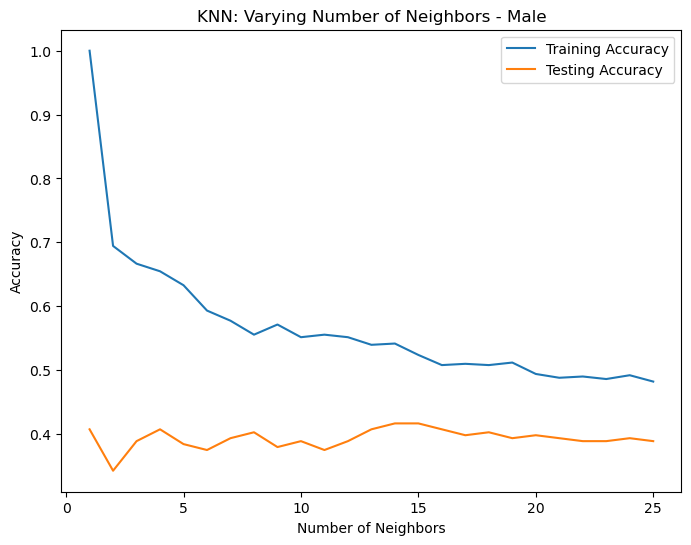

In [10]:
# Creating a plot to test n_neighbors
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_scaled_male, y_train_male)
    train_accuracies[neighbor] = knn.score(X_train_scaled_male, y_train_male)
    test_accuracies[neighbor] = knn.score(X_test_scaled_male, y_test_male)
    
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors - Male")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled_male, y_train_male)

KNeighborsClassifier(n_neighbors=15)

In [14]:
print(knn.score(X_test_scaled_male, y_test_male))

0.4166666666666667


## Linear Regression

In [ ]:
# data = pd.read_csv('voice_data_dw.csv')    # normal data, dw = data wrangling
data = pd.read_csv('voice_data_no_trim.csv')     # test data
df = pd.DataFrame(data)
df.head()

In [236]:
df_female['actor_gender'].value_counts()

actor_gender
2    2043
Name: count, dtype: int64

In [63]:
df.columns

Index(['filename', 'emotion', 'voice_intensity', 'statement',
       'statement_repetition', 'actor_gender', 'mfcc_mean', 'mfcc_median',
       'mfcc_std', 'mfcc_skew', 'mfcc_kurtosis', 'mfcc_delta_mean',
       'mfcc_delta_median', 'mfcc_delta_std', 'mfcc_delta_skew',
       'mfcc_delta_kurtosis', 'mfcc_delta2_mean', 'mfcc_delta2_median',
       'mfcc_delta2_std', 'mfcc_delta2_skew', 'mfcc_delta2_kurtosis',
       'chroma_mean', 'chroma_median', 'chroma_std', 'chroma_skew',
       'chroma_kurtosis', 'mel_mean', 'mel_max', 'mel_min', 'mel_median',
       'mel_std', 'mel_skew', 'centroid_mean', 'centroid_max', 'centroid_min',
       'centroid_median', 'centroid_std', 'centroid_skew', 'centroid_kurtosis',
       'roll_off_mean', 'roll_off_max', 'roll_off_min', 'roll_off_median',
       'roll_off_std', 'roll_off_skew', 'roll_off_kurtosis', 'rms_mean',
       'rms_max', 'rms_min', 'rms_median', 'rms_std', 'rms_skew',
       'rms_kurtosis'],
      dtype='object')

In [214]:
# Dividing dataset into genders
df_male = df[df['actor_gender'] == 1]
df_female = df[df['actor_gender'] == 2]

# Features and labels for male dataset
X_male = df_male[['rms_max', 'rms_std', 'mel_std', 'mel_max', 'mfcc_std', 'mel_mean', 'mel_skew']].values  # Include all your feature columns
y_male = df_male['emotion'].values

# Features and labels for female dataset
X_female = df_female[['rms_max', 'rms_std', 'mel_std', 'mel_max', 'mfcc_std', 'mel_mean', 'mel_skew']].values  # Include all your feature columns
y_female = df_female['emotion'].values

# Splitting the male dataset
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.3, random_state=42, shuffle=True, stratify=y_male)

# Splitting the female dataset
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.3, random_state=42, shuffle=True, stratify=y_female)

print("Male Dataset:", X_train_male.shape, X_test_male.shape, y_train_male.shape, y_test_male.shape)
print("Female Dataset:", X_train_female.shape, X_test_female.shape, y_train_female.shape, y_test_female.shape)

Male Dataset: (1379, 7) (591, 7) (1379,) (591,)
Female Dataset: (1430, 7) (613, 7) (1430,) (613,)


In [215]:
from sklearn.preprocessing import StandardScaler

# Assuming df_male and df_female are already defined

# Features and labels for male and female datasets
X_male = df_male[['rms_max', 'rms_std', 'mel_std', 'mel_max', 'mfcc_std', 'mel_mean', 'mel_skew']].values
y_male = df_male['emotion'].values
X_female = df_female[['rms_max', 'rms_std', 'mel_std', 'mel_max', 'mfcc_std', 'mel_mean', 'mel_skew']].values
y_female = df_female['emotion'].values

# Splitting the male dataset
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.3, random_state=42, shuffle=True, stratify=y_male)

# Splitting the female dataset
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.3, random_state=42, shuffle=True, stratify=y_female)

# Initialize scalers for male and female datasets
scaler_male = StandardScaler()
scaler_female = StandardScaler()

# Scale the male datasets
X_train_scaled_male = scaler_male.fit_transform(X_train_male)
X_test_scaled_male = scaler_male.transform(X_test_male)

# Scale the female datasets
X_train_scaled_female = scaler_female.fit_transform(X_train_female)
X_test_scaled_female = scaler_female.transform(X_test_female)

# Now you have scaled training and testing sets for both male and female datasets


In [227]:
df_female['actor_gender'].sum()

4086

In [216]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [217]:
model.fit(X_train_scaled_male, y_train_male)

LinearRegression()

In [219]:
r_sq = model.score(X_test_scaled_male, y_test_male)
print(f"coefficient of determination for male actors: {r_sq}")

coefficient of determination for male actors: 0.056407524170694834


In [220]:
model.fit(X_train_scaled_female, y_train_female)

LinearRegression()

In [221]:
r_sq = model.score(X_test_scaled_female, y_test_female)
print(f"coefficient of determination for male actors: {r_sq}")

coefficient of determination for male actors: 0.028653686840171444


## Random Forrest Classifier

In [109]:
# data = pd.read_csv('voice_data_dw.csv')    # normal data, dw = data wrangling
data = pd.read_csv('voice_data_no_trim.csv')     # test data
df = pd.DataFrame(data)
df.head()

filename  modality  vocal_channel  emotion  \
0  03-01-01-01-01-01-01.wav         3              1        1   
1  03-01-01-01-01-02-01.wav         3              1        1   
2  03-01-01-01-02-01-01.wav         3              1        1   
3  03-01-01-01-02-02-01.wav         3              1        1   
4  03-01-02-01-01-01-01.wav         3              1        2   

   voice_intensity  statement  statement_repetition  actor_gender  mfcc_mean  \
0                1          1                     1             1 -13.750966   
1                1          1                     2             1 -14.013200   
2                1          2                     1             1 -13.286643   
3                1          2                     2             1 -13.380160   
4                1          1                     1             1 -14.227764   

    mfcc_max  ...   rms_std  rms_skew  rms_kurtosis  zero_cr_mean  \
0  208.77170  ...  0.002752  0.523488     -0.223807      0.071506   
1  203.44556  ...  0.003002  0.472005     -0.447499      0.063912   
2  212.63199  ...  0.003825  1.126351      0.754771      0.086652   
3  214.31924  ...  0.004013  1.583204      1.841371      0.088229   
4  217.13522  ...  0.002391  1.028021      0.677945      0.082396   

   zero_cr_max  zero_cr_min  zero_cr_median  zero_cr_std  zero_cr_skew  \
0     0.208984     0.023438        0.046875     0.049214      1.349598   
1     0.183105     0.019531        0.048340     0.042300      1.347601   
2     0.424316     0.014648        0.048340     0.091483      2.158822   
3     0.406250     0.013184        0.047852     0.093873      1.803562   
4     0.374512     0.018555        0.047852     0.076891      2.038556   

   zero_cr_kurtosis  
0          0.792986  
1          0.843776  
2          4.017514  
3          2.245144  
4          3.821344  

[5 rows x 78 columns]

In [64]:
# Load your data        # Archived for later testing
# X_train, X_test, y_train, y_test = load_data(test_size=0.2, mfcc=True, chroma=True, mel=True, centroid=True, roll_off=True, bandwidth=True, tempo=True, energy=True, rms=True, harmonic=True, percussive=True, tonnetz=True)

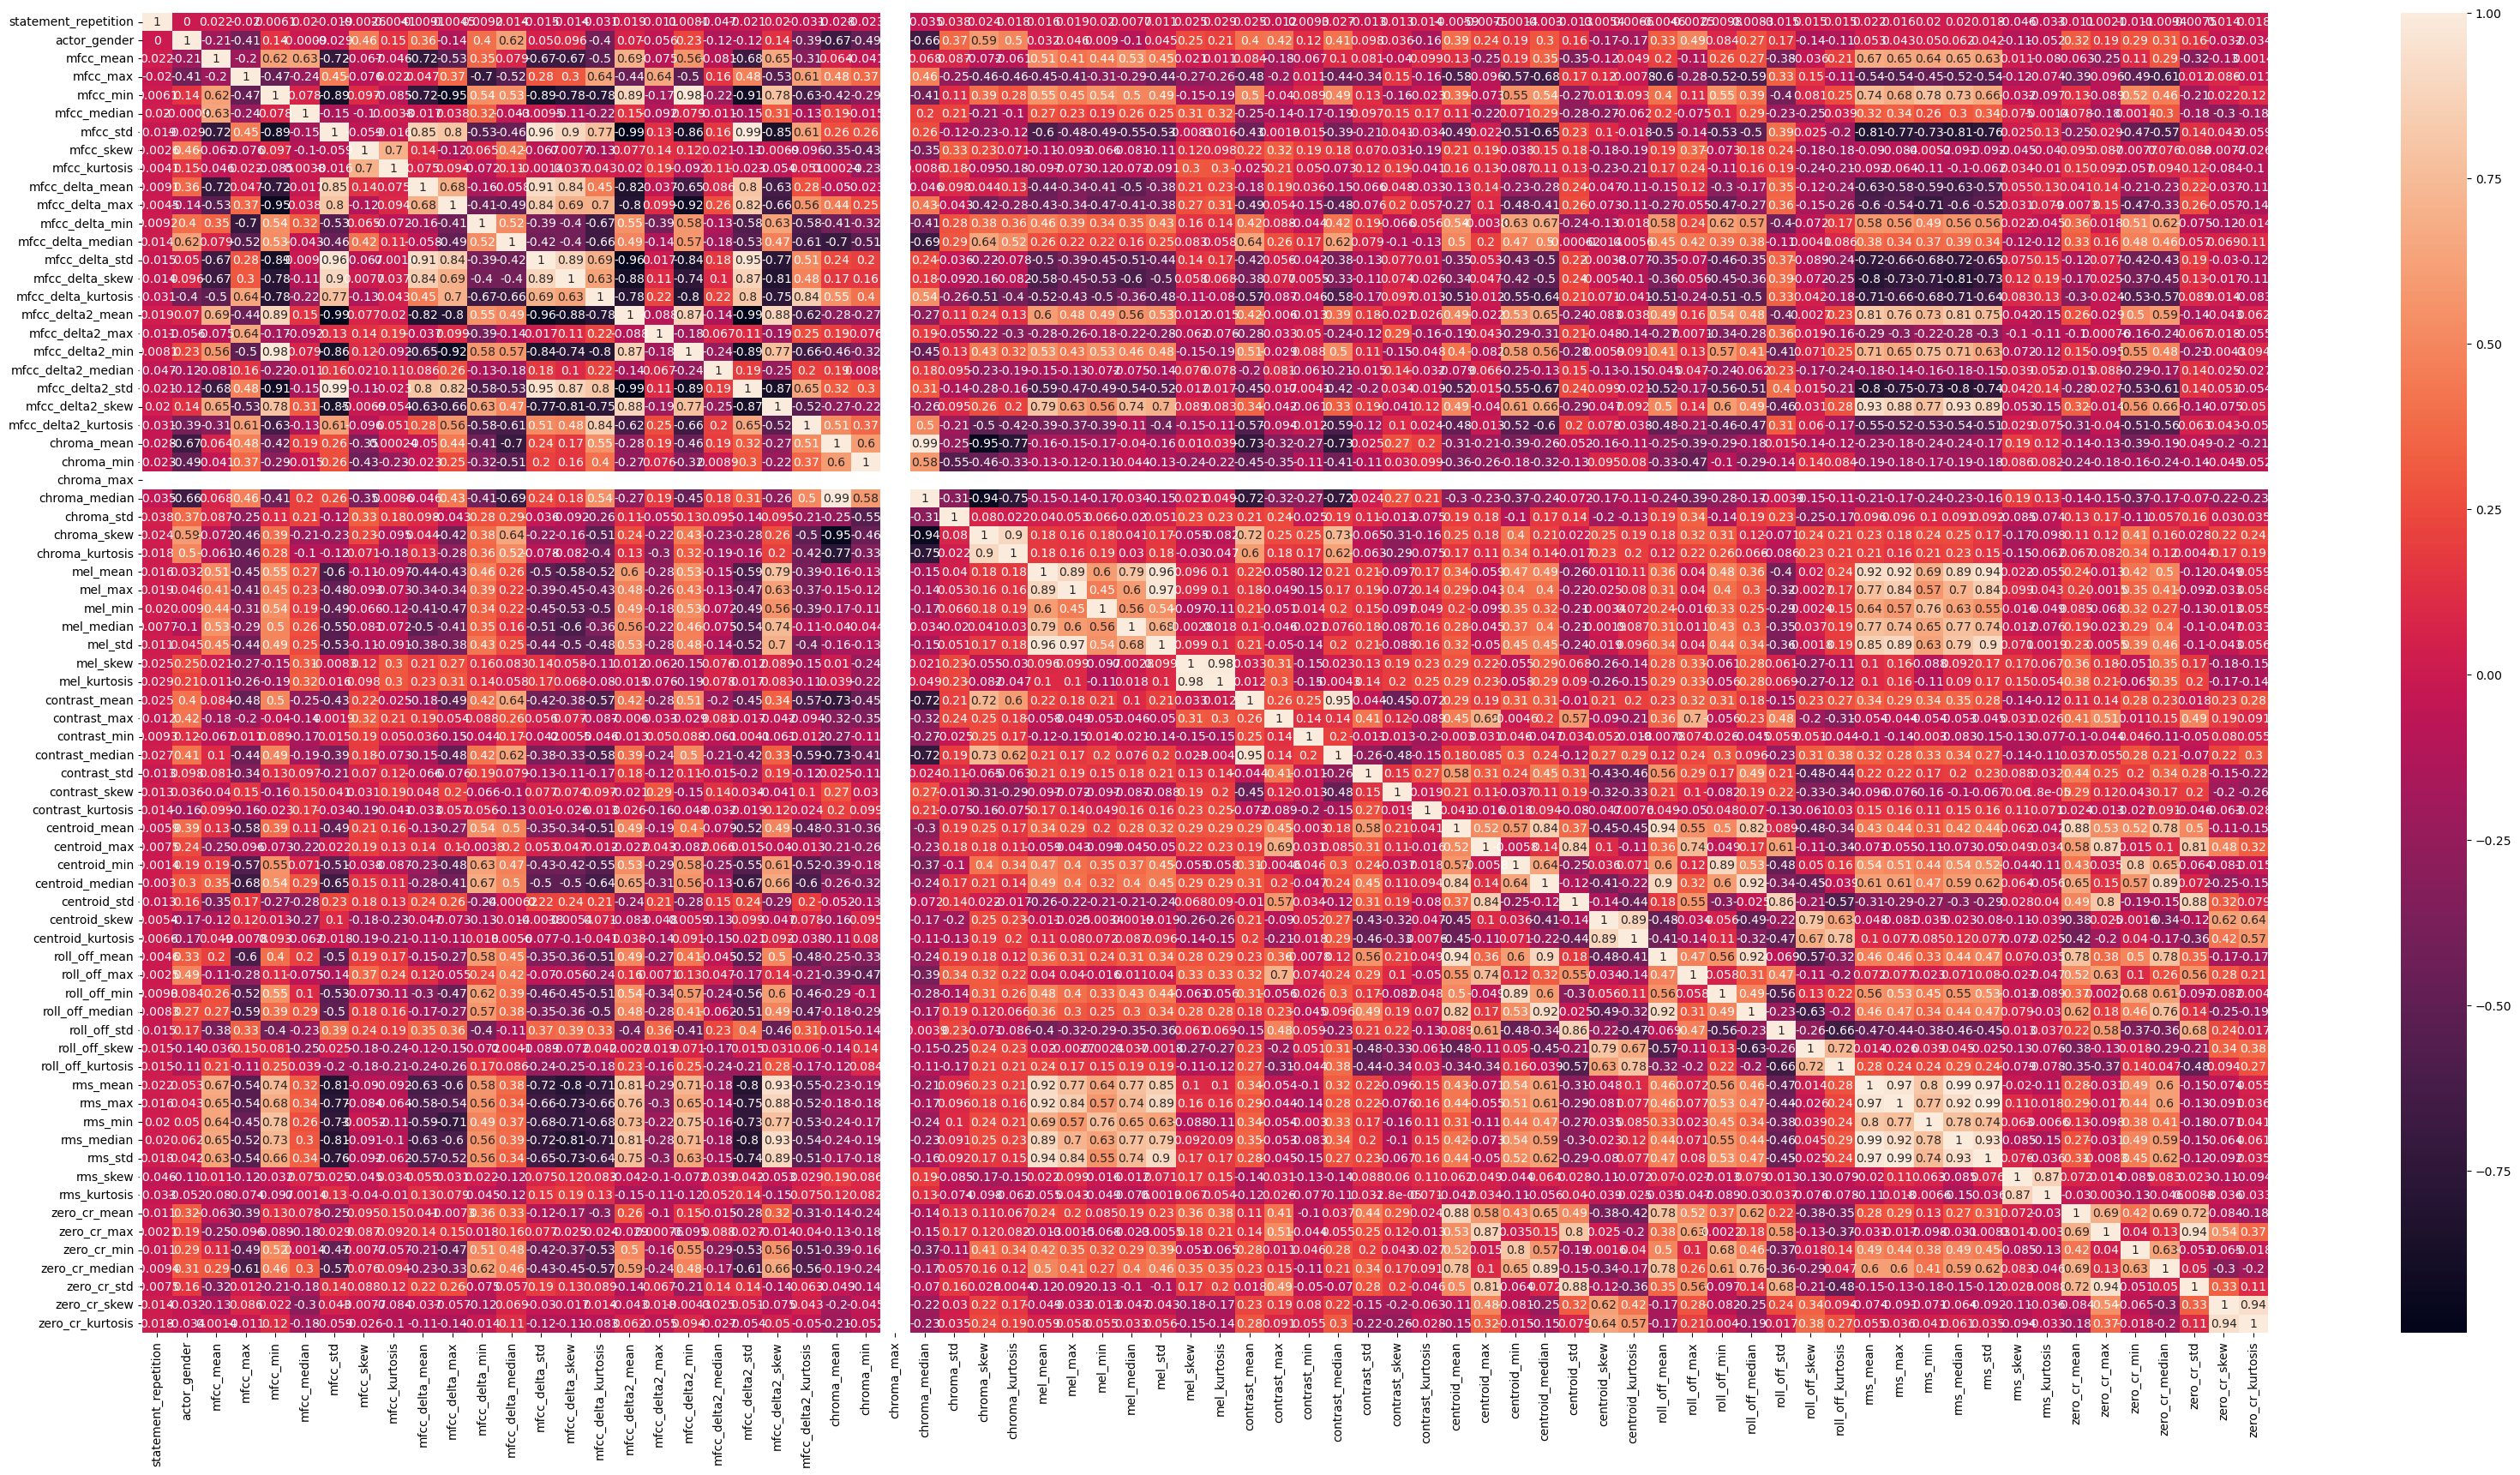

In [41]:
# Make a heatmap of the data
plt.figure(figsize=(40,20))
sns.heatmap(df.iloc[:,6:].corr(), annot=True)
plt.show()

In [42]:
df.columns

Index(['filename', 'modality', 'vocal_channel', 'emotion', 'voice_intensity',
       'statement', 'statement_repetition', 'actor_gender', 'mfcc_mean',
       'mfcc_max', 'mfcc_min', 'mfcc_median', 'mfcc_std', 'mfcc_skew',
       'mfcc_kurtosis', 'mfcc_delta_mean', 'mfcc_delta_max', 'mfcc_delta_min',
       'mfcc_delta_median', 'mfcc_delta_std', 'mfcc_delta_skew',
       'mfcc_delta_kurtosis', 'mfcc_delta2_mean', 'mfcc_delta2_max',
       'mfcc_delta2_min', 'mfcc_delta2_median', 'mfcc_delta2_std',
       'mfcc_delta2_skew', 'mfcc_delta2_kurtosis', 'chroma_mean', 'chroma_min',
       'chroma_max', 'chroma_median', 'chroma_std', 'chroma_skew',
       'chroma_kurtosis', 'mel_mean', 'mel_max', 'mel_min', 'mel_median',
       'mel_std', 'mel_skew', 'mel_kurtosis', 'contrast_mean', 'contrast_max',
       'contrast_min', 'contrast_median', 'contrast_std', 'contrast_skew',
       'contrast_kurtosis', 'centroid_mean', 'centroid_max', 'centroid_min',
       'centroid_median', 'centroid_std', 'cen

In [110]:
def emotion_to_string(e):
    if e % 8 == 1:
        return 'neutral'
    elif e % 8 == 2:
        return 'calm'
    elif e % 8 == 3:
        return 'happy'
    elif e % 8 == 4:
        return 'sad'
    elif e % 8 == 5:
        return 'angry'
    elif e % 8 == 6:
        return 'fearful'
    elif e % 8 == 7:
        return 'disgust'
    else:
        return 'surprised'

# Applying the function to the 'emotion' column
df['emotion'] = df['emotion'].apply(emotion_to_string)

In [111]:
feature_list = df.columns[8:]

In [129]:
# Dividing dataset into genders
df_male = df[df['actor_gender'] == 1]
df_female = df[df['actor_gender'] == 2]

# Features and labels for male dataset
X_male = df_male[feature_list].values  # Include all your feature columns
y_male = df_male['emotion'].values

# Features and labels for female dataset
X_female = df_female[feature_list].values  # Include all your feature columns
y_female = df_female['emotion'].values

# Splitting the male dataset
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.3, random_state=42, shuffle=True, stratify=y_male)

# Splitting the female dataset
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.3, random_state=42, shuffle=True, stratify=y_female)

print("Male Dataset:", X_train_male.shape, X_test_male.shape, y_train_male.shape, y_test_male.shape)
print("Female Dataset:", X_train_female.shape, X_test_female.shape, y_train_female.shape, y_test_female.shape)


Male Dataset: (504, 70) (216, 70) (504,) (216,)
Female Dataset: (504, 70) (216, 70) (504,) (216,)


In [130]:
# Features and labels for male and female datasets
X_male = df_male[feature_list].values
y_male = df_male['emotion'].values
X_female = df_female[feature_list].values
y_female = df_female['emotion'].values

# Splitting the male dataset
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.25, random_state=42, shuffle=True, stratify=y_male)

# Splitting the female dataset
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.25, random_state=42, shuffle=True, stratify=y_female)

# Initialize scalers for male and female datasets
scaler_male = StandardScaler()
scaler_female = StandardScaler()

# Scale the male datasets
X_train_scaled_male = scaler_male.fit_transform(X_train_male)
X_test_scaled_male = scaler_male.transform(X_test_male)

# Scale the female datasets
X_train_scaled_female = scaler_female.fit_transform(X_train_female)
X_test_scaled_female = scaler_female.transform(X_test_female)


In [131]:
# Training male dataset
model_male = RandomForestClassifier(n_estimators=100, max_features=20, min_samples_leaf=15, random_state=42, n_jobs=-1)
model_male.fit(X_train_scaled_male, y_train_male)

RandomForestClassifier(max_features=20, min_samples_leaf=15, n_jobs=-1,
                       random_state=42)

In [132]:
# Training female dataset
model_female = RandomForestClassifier(n_estimators=100, max_features=20, min_samples_leaf=15, random_state=42, n_jobs=-1)
model_female.fit(X_train_scaled_female, y_train_female)

RandomForestClassifier(max_features=20, min_samples_leaf=15, n_jobs=-1,
                       random_state=42)

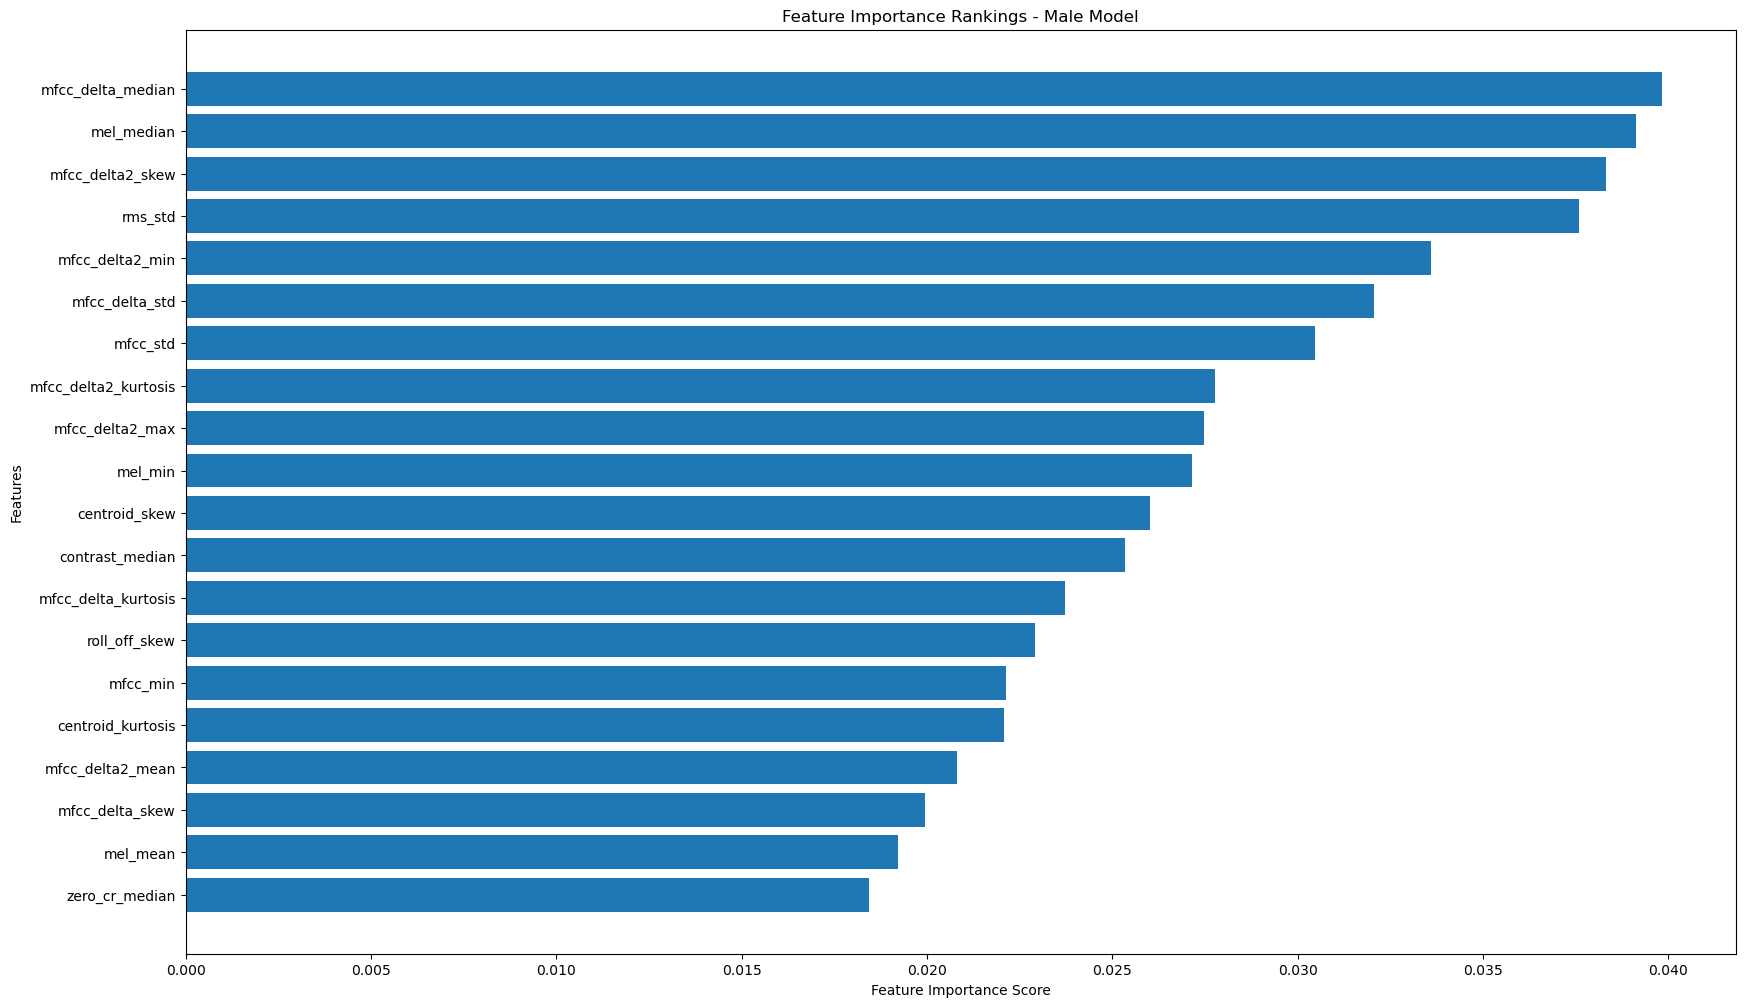

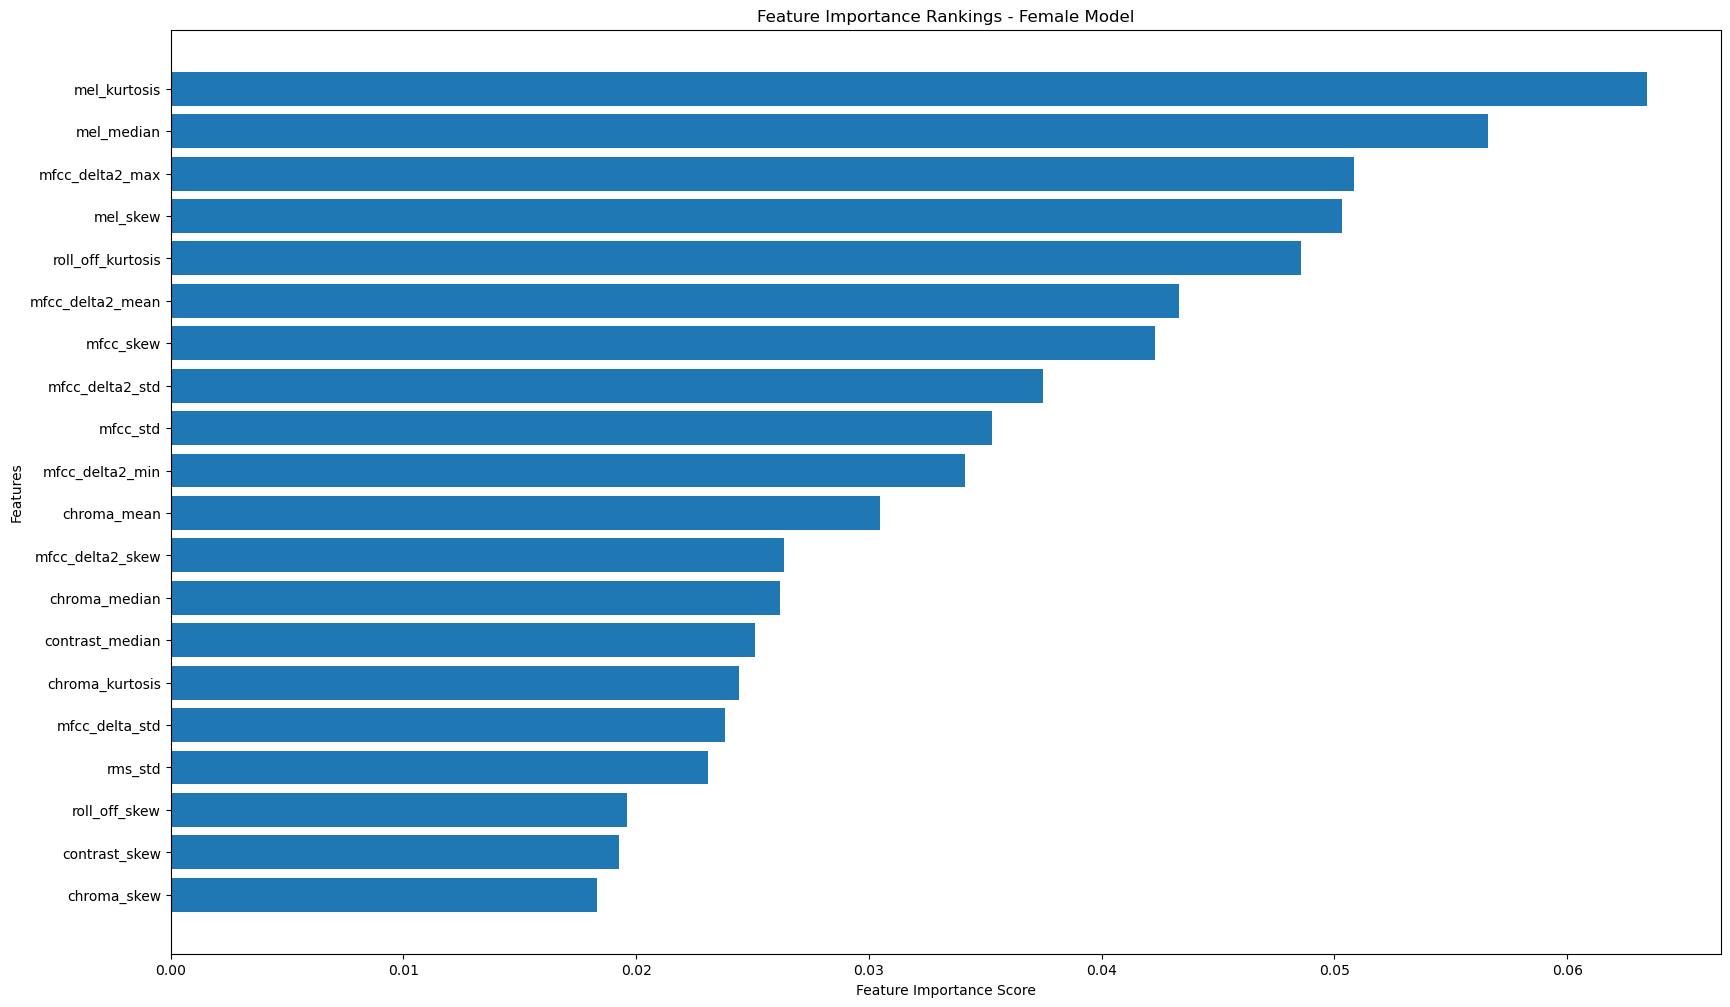

In [133]:
# 'model_male' and 'model_female' are the trained Random Forest models
feature_importances_male = model_male.feature_importances_
feature_importances_female = model_female.feature_importances_

# Update this list to match the features used in your current model
feature_names = feature_list

# Creating dictionaries to map feature names to their importances for each model
importances_male = dict(zip(feature_names, feature_importances_male))
importances_female = dict(zip(feature_names, feature_importances_female))

# Function to plot feature importances and return top 20 features
def plot_feature_importances_and_get_top_20(importances, title):
    # Sort features by importance
    sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

    # Extract feature names and scores
    sorted_features = [x[0] for x in sorted_importances]
    sorted_scores = [x[1] for x in sorted_importances]

    # Plot
    plt.figure(figsize=(20, 12))
    plt.barh(sorted_features[:20], sorted_scores[:20])  # Plot only top 20 features
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

    # Return top 20 features
    return sorted_features[:20]

# Get and plot top 20 features for male model
top_20_features_male = plot_feature_importances_and_get_top_20(importances_male, 'Feature Importance Rankings - Male Model')

# Get and plot top 20 features for female model
top_20_features_female = plot_feature_importances_and_get_top_20(importances_female, 'Feature Importance Rankings - Female Model')

# # Function to plot feature importances
# def plot_feature_importances(importances, title):
#     # Sort features by importance
#     sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

#     # Extract feature names and scores
#     sorted_features = [x[0] for x in sorted_importances]
#     sorted_scores = [x[1] for x in sorted_importances]

#     # Plot
#     plt.figure(figsize=(20, 12))
#     plt.barh(sorted_features, sorted_scores)
#     plt.xlabel('Feature Importance Score')
#     plt.ylabel('Features')
#     plt.title(title)
#     plt.gca().invert_yaxis()
#     plt.show()

# # Plot for male model
# plot_feature_importances(importances_male, 'Feature Importance Rankings - Male Model')

# # Plot for female model
# plot_feature_importances(importances_female, 'Feature Importance Rankings - Female Model')

## Gradiant Boosting

In [101]:
# data = pd.read_csv('voice_data_dw.csv')    # normal data, dw = data wrangling
data = pd.read_csv('voice_data_no_trim.csv')     # test data
df = pd.DataFrame(data)
df.head()

filename  modality  vocal_channel  emotion  \
0  03-01-01-01-01-01-01.wav         3              1        1   
1  03-01-01-01-01-02-01.wav         3              1        1   
2  03-01-01-01-02-01-01.wav         3              1        1   
3  03-01-01-01-02-02-01.wav         3              1        1   
4  03-01-02-01-01-01-01.wav         3              1        2   

   voice_intensity  statement  statement_repetition  actor_gender  mfcc_mean  \
0                1          1                     1             1 -13.750966   
1                1          1                     2             1 -14.013200   
2                1          2                     1             1 -13.286643   
3                1          2                     2             1 -13.380160   
4                1          1                     1             1 -14.227764   

    mfcc_max  ...   rms_std  rms_skew  rms_kurtosis  zero_cr_mean  \
0  208.77170  ...  0.002752  0.523488     -0.223807      0.071506   
1  203.44556  ...  0.003002  0.472005     -0.447499      0.063912   
2  212.63199  ...  0.003825  1.126351      0.754771      0.086652   
3  214.31924  ...  0.004013  1.583204      1.841371      0.088229   
4  217.13522  ...  0.002391  1.028021      0.677945      0.082396   

   zero_cr_max  zero_cr_min  zero_cr_median  zero_cr_std  zero_cr_skew  \
0     0.208984     0.023438        0.046875     0.049214      1.349598   
1     0.183105     0.019531        0.048340     0.042300      1.347601   
2     0.424316     0.014648        0.048340     0.091483      2.158822   
3     0.406250     0.013184        0.047852     0.093873      1.803562   
4     0.374512     0.018555        0.047852     0.076891      2.038556   

   zero_cr_kurtosis  
0          0.792986  
1          0.843776  
2          4.017514  
3          2.245144  
4          3.821344  

[5 rows x 78 columns]

In [102]:
def emotion_to_string(e):
    if e % 8 == 1:
        return 'neutral'
    elif e % 8 == 2:
        return 'calm'
    elif e % 8 == 3:
        return 'happy'
    elif e % 8 == 4:
        return 'sad'
    elif e % 8 == 5:
        return 'angry'
    elif e % 8 == 6:
        return 'fearful'
    elif e % 8 == 7:
        return 'disgust'
    else:
        return 'surprised'

# Applying the function to the 'emotion' column
df['emotion'] = df['emotion'].apply(emotion_to_string)

In [65]:
df.columns

Index(['filename', 'modality', 'vocal_channel', 'emotion', 'voice_intensity',
       'statement', 'statement_repetition', 'actor_gender', 'mfcc_mean',
       'mfcc_max', 'mfcc_min', 'mfcc_median', 'mfcc_std', 'mfcc_skew',
       'mfcc_kurtosis', 'mfcc_delta_mean', 'mfcc_delta_max', 'mfcc_delta_min',
       'mfcc_delta_median', 'mfcc_delta_std', 'mfcc_delta_skew',
       'mfcc_delta_kurtosis', 'mfcc_delta2_mean', 'mfcc_delta2_max',
       'mfcc_delta2_min', 'mfcc_delta2_median', 'mfcc_delta2_std',
       'mfcc_delta2_skew', 'mfcc_delta2_kurtosis', 'chroma_mean', 'chroma_min',
       'chroma_max', 'chroma_median', 'chroma_std', 'chroma_skew',
       'chroma_kurtosis', 'mel_mean', 'mel_max', 'mel_min', 'mel_median',
       'mel_std', 'mel_skew', 'mel_kurtosis', 'contrast_mean', 'contrast_max',
       'contrast_min', 'contrast_median', 'contrast_std', 'contrast_skew',
       'contrast_kurtosis', 'centroid_mean', 'centroid_max', 'centroid_min',
       'centroid_median', 'centroid_std', 'cen

In [103]:
feature_list = df.columns[8:]

In [104]:
# Dividing dataset into genders
df_male = df[df['actor_gender'] == 1]
df_female = df[df['actor_gender'] == 2]

# Features and labels for male dataset
X_male = df_male[feature_list].values  # Include all your feature columns
y_male = df_male['emotion'].values

# Features and labels for female dataset
X_female = df_female[feature_list].values  # Include all your feature columns
y_female = df_female['emotion'].values

# Splitting the male dataset
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.3, random_state=42, shuffle=True, stratify=y_male)

# Splitting the female dataset
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.3, random_state=42, shuffle=True, stratify=y_female)

print("Male Dataset:", X_train_male.shape, X_test_male.shape, y_train_male.shape, y_test_male.shape)
print("Female Dataset:", X_train_female.shape, X_test_female.shape, y_train_female.shape, y_test_female.shape)

Male Dataset: (504, 70) (216, 70) (504,) (216,)
Female Dataset: (504, 70) (216, 70) (504,) (216,)


In [105]:
# Features and labels for male and female datasets
X_male = df_male[feature_list].values
y_male = df_male['emotion'].values
X_female = df_female[feature_list].values
y_female = df_female['emotion'].values

# Splitting the male dataset
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(
    X_male, y_male, test_size=0.25, random_state=42, shuffle=True, stratify=y_male)

# Splitting the female dataset
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(
    X_female, y_female, test_size=0.25, random_state=42, shuffle=True, stratify=y_female)

# Initialize scalers for male and female datasets
scaler_male = StandardScaler()
scaler_female = StandardScaler()

# Scale the male datasets
X_train_scaled_male = scaler_male.fit_transform(X_train_male)
X_test_scaled_male = scaler_male.transform(X_test_male)

# Scale the female datasets
X_train_scaled_female = scaler_female.fit_transform(X_train_female)
X_test_scaled_female = scaler_female.transform(X_test_female)

In [106]:
# Initialize the Gradient Boosting Classifier and train the model
gb_clf_male = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_split=5, 
                                         min_samples_leaf=5, max_features=20, random_state=42)
gb_clf_male.fit(X_train_scaled_male, y_train_male)

GradientBoostingClassifier(max_depth=5, max_features=20, min_samples_leaf=5,
                           min_samples_split=5, random_state=42)

In [107]:
# Initialize the Gradient Boosting Classifier and train the model
gb_clf_female = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_split=5, 
                                           min_samples_leaf=5, max_features=20, random_state=42)
gb_clf_female.fit(X_train_scaled_female, y_train_female)

GradientBoostingClassifier(max_depth=5, max_features=20, min_samples_leaf=5,
                           min_samples_split=5, random_state=42)

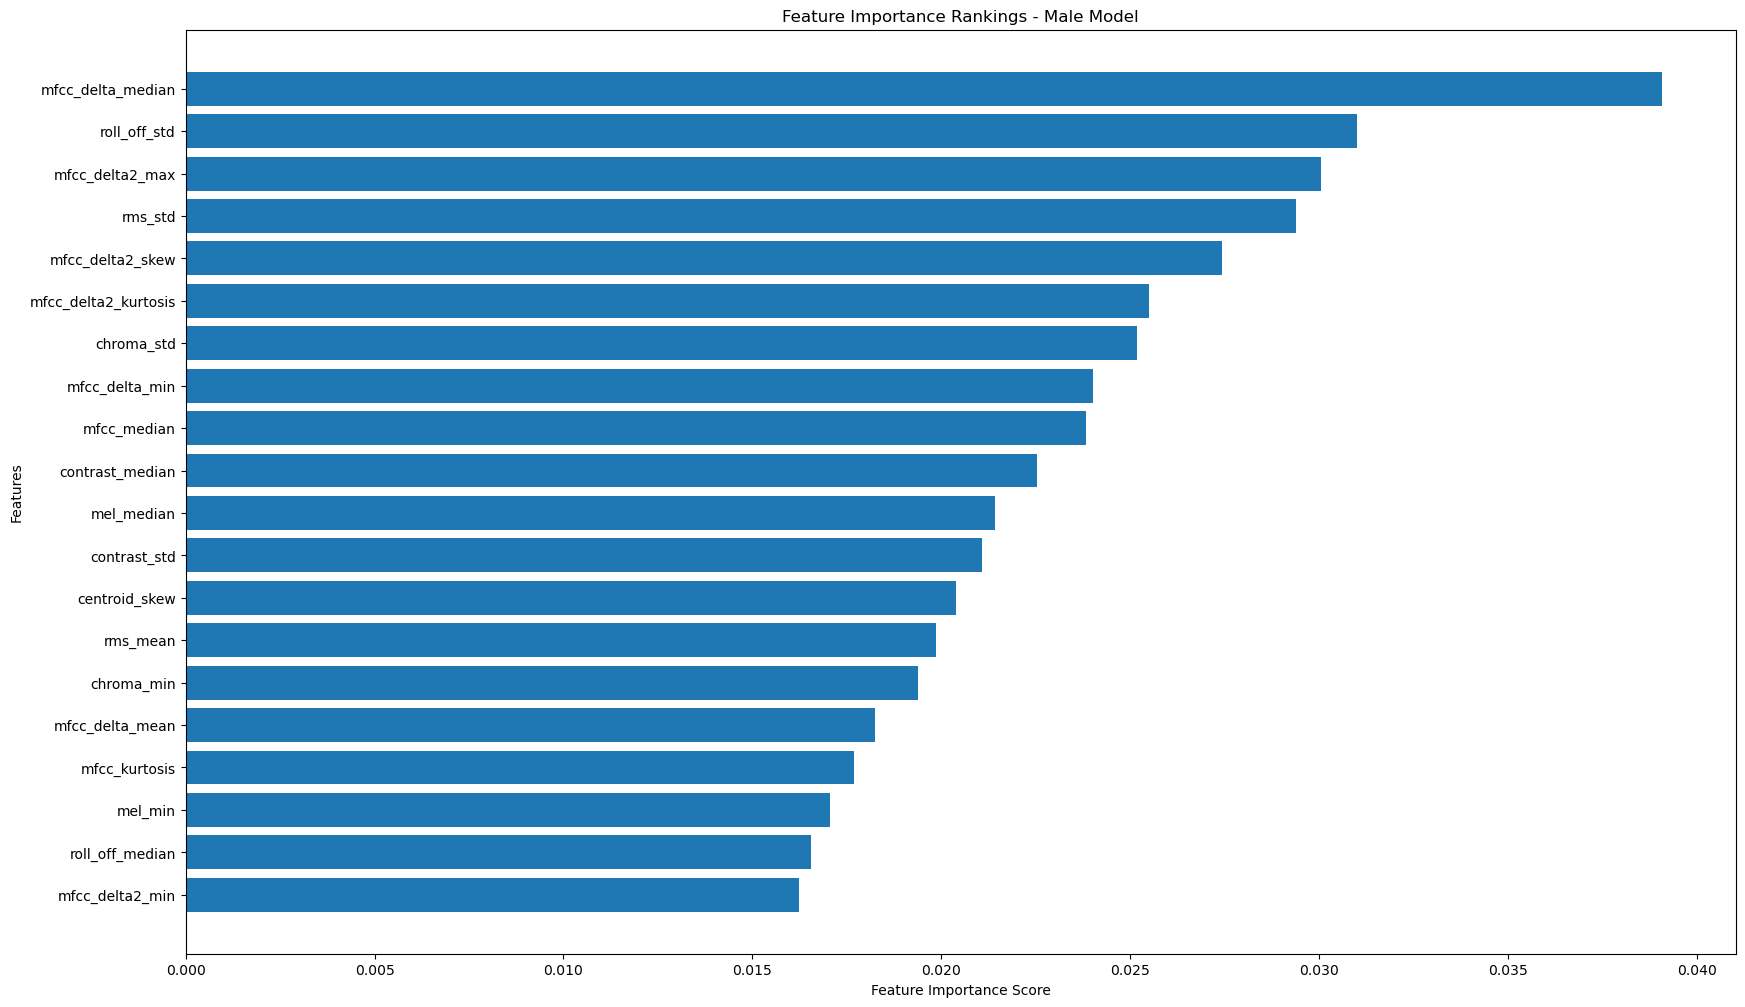

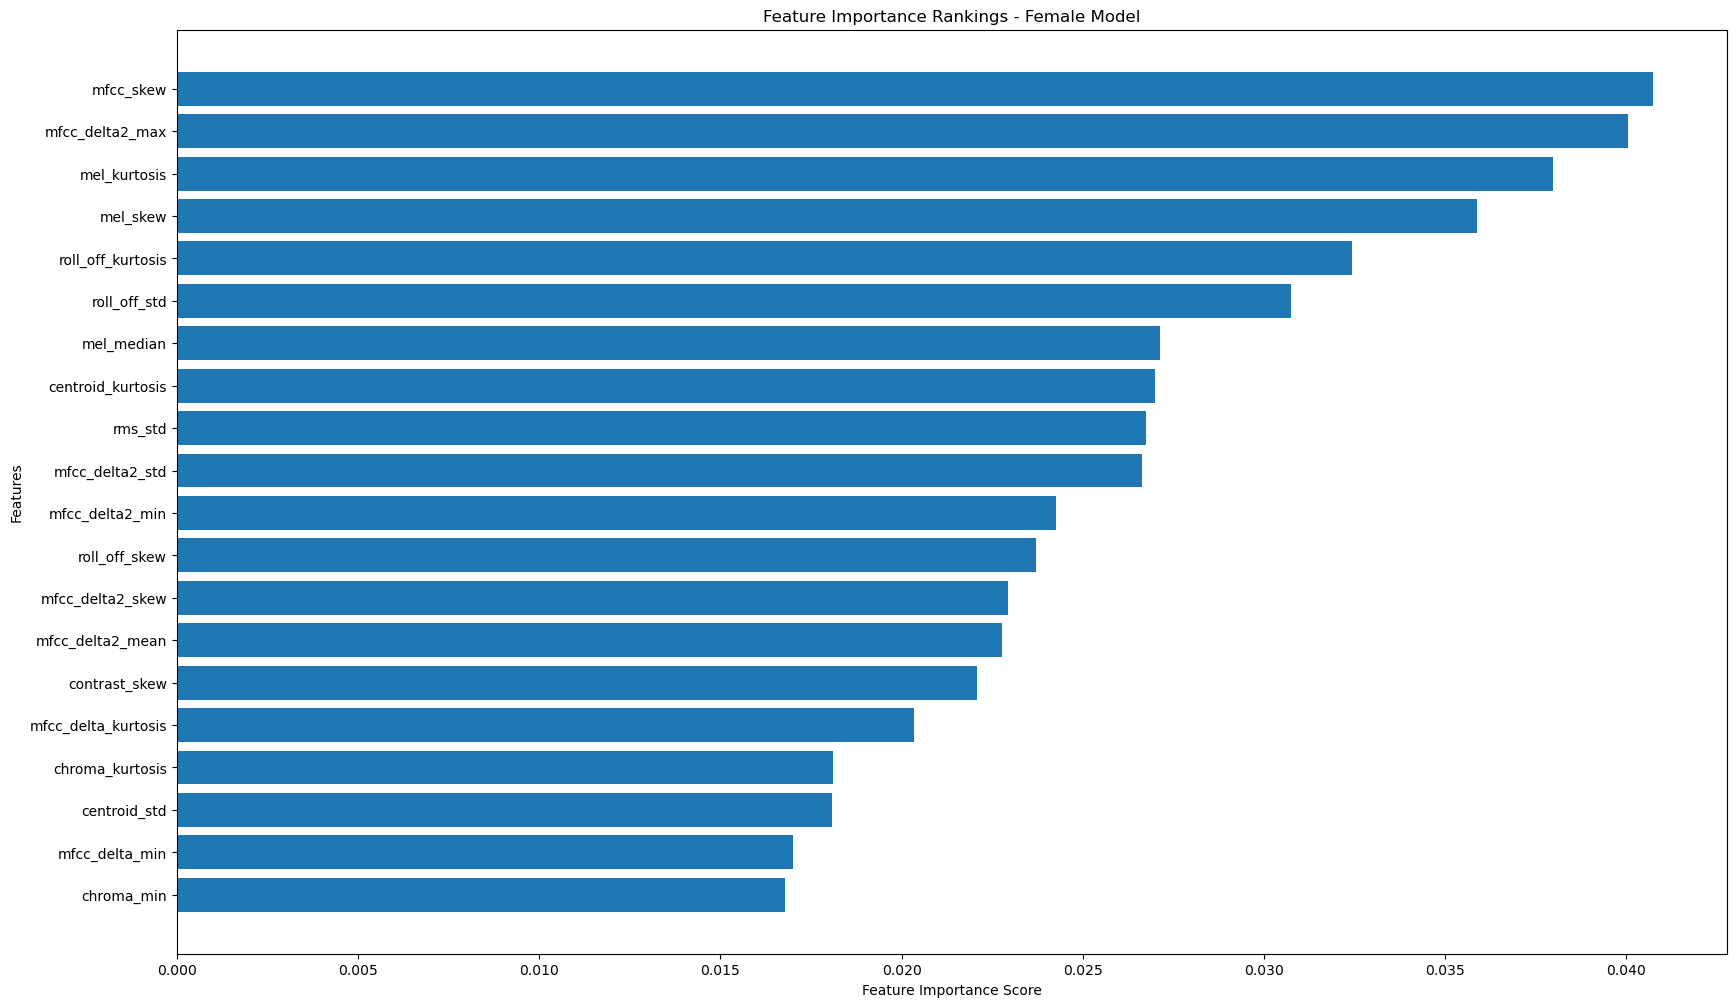

In [108]:
# 'model_male' and 'model_female' are the trained Random Forest models
gb_feature_importances_male = gb_clf_male.feature_importances_
gb_feature_importances_female = gb_clf_female.feature_importances_

# Update this list to match the features used in your current model
gb_feature_names = feature_list

# Creating dictionaries to map feature names to their importances for each model
gb_importances_male = dict(zip(gb_feature_names, gb_feature_importances_male))
gb_importances_female = dict(zip(gb_feature_names, gb_feature_importances_female))

# Function to plot feature importances and return top 20 features
def plot_gb_feature_importances_and_get_top_20(importances, title):
    # Sort features by importance
    gb_sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

    # Extract feature names and scores
    gb_sorted_features = [x[0] for x in gb_sorted_importances]
    gb_sorted_scores = [x[1] for x in gb_sorted_importances]

    # Plot
    plt.figure(figsize=(20, 12))
    plt.barh(gb_sorted_features[:20], gb_sorted_scores[:20])  # Plot only top 20 features
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

    # Return top 20 features
    return gb_sorted_features[:20]

# Get and plot top 20 features for male model
gb_top_20_features_male = plot_gb_feature_importances_and_get_top_20(gb_importances_male, 'Feature Importance Rankings - Male Model')

# Get and plot top 20 features for female model
gb_top_20_features_female = plot_gb_feature_importances_and_get_top_20(gb_importances_female, 'Feature Importance Rankings - Female Model')


In [71]:
# Predict on the test set
y_pred_male = gb_clf_male.predict(X_test_scaled_male)
y_pred_female = gb_clf_female.predict(X_test_scaled_female)

In [72]:
# Evaluate the models
accuracy_male = accuracy_score(y_test_male, y_pred_male)
accuracy_female = accuracy_score(y_test_female, y_pred_female)
print(f"Accuracy for Male Model: {accuracy_male}")
print(classification_report(y_test_male, y_pred_male))
print(f"Accuracy for Female Model: {accuracy_female}")
print(classification_report(y_test_female, y_pred_female))

Accuracy for Male Model: 0.6018518518518519
              precision    recall  f1-score   support

       angry       0.64      0.64      0.64        28
        calm       0.73      0.76      0.75        29
     disgust       0.82      0.79      0.81        29
     fearful       0.58      0.52      0.55        29
       happy       0.44      0.48      0.46        29
     neutral       0.40      0.14      0.21        14
         sad       0.49      0.62      0.55        29
   surprised       0.60      0.62      0.61        29

    accuracy                           0.60       216
   macro avg       0.59      0.57      0.57       216
weighted avg       0.60      0.60      0.60       216

Accuracy for Female Model: 0.6064814814814815
              precision    recall  f1-score   support

       angry       0.67      0.79      0.72        28
        calm       0.75      0.62      0.68        29
     disgust       0.63      0.66      0.64        29
     fearful       0.52      0.76      0.6

In [98]:
# Feature importance
feature_importances_male = gb_clf_male.feature_importances_
feature_importances_female = gb_clf_female.feature_importances_

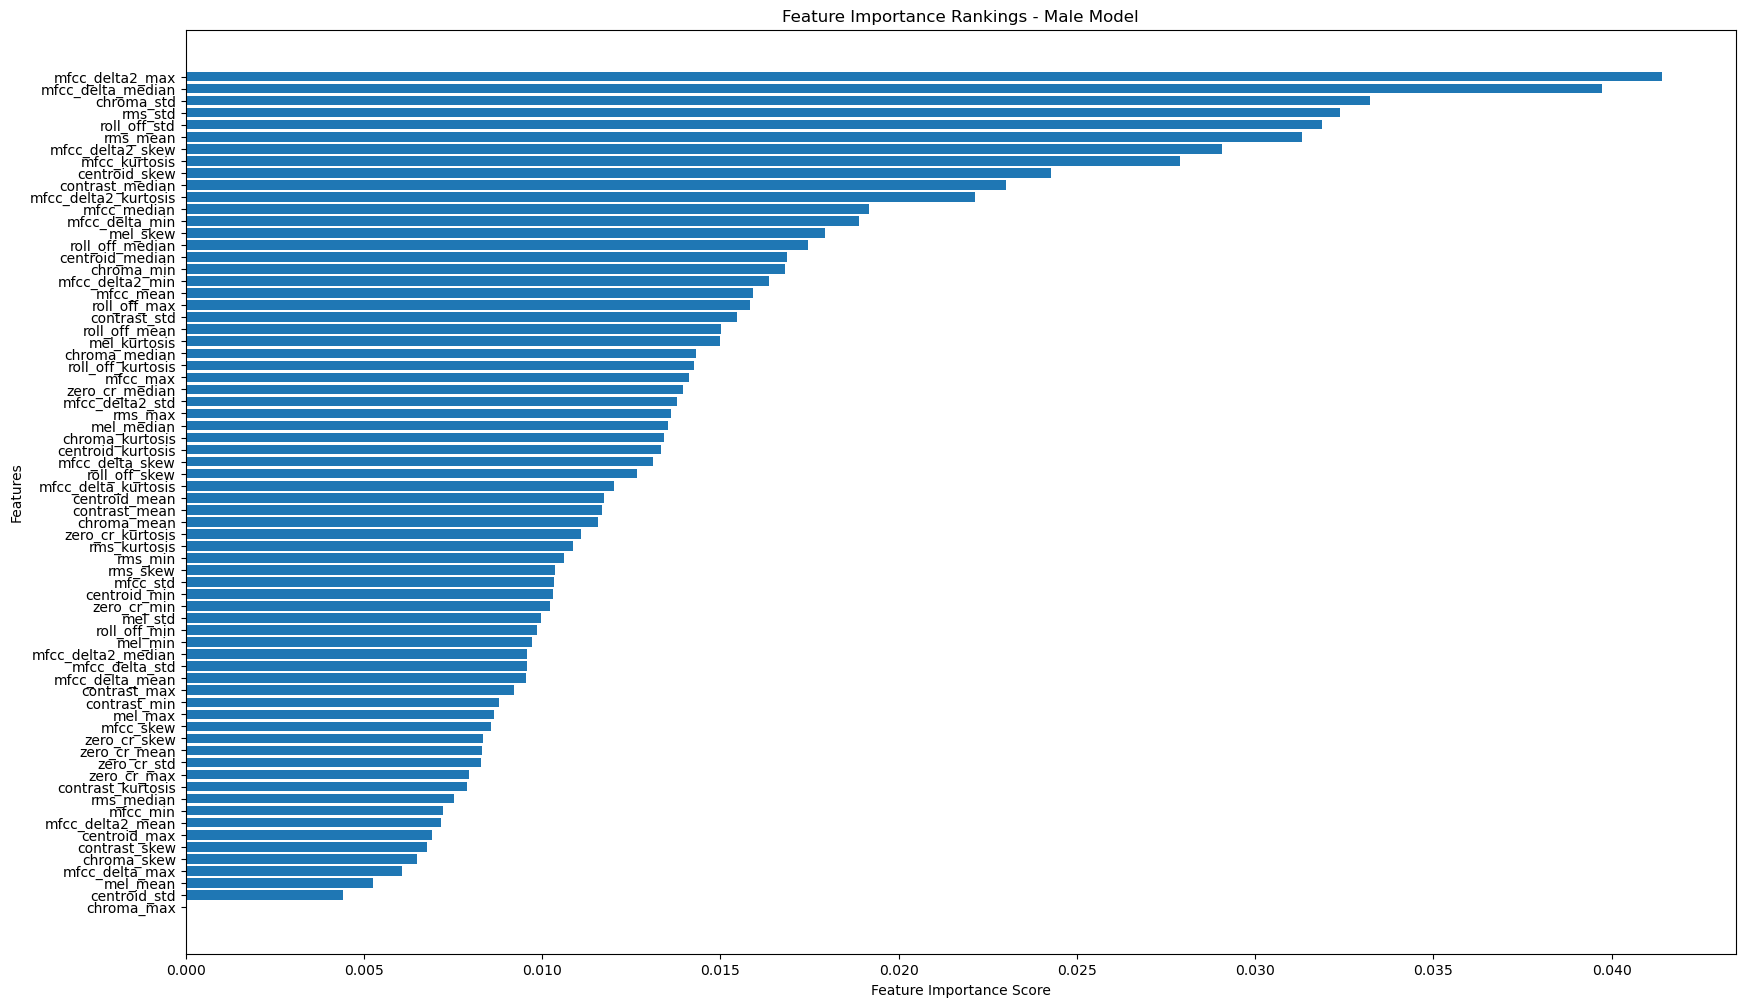

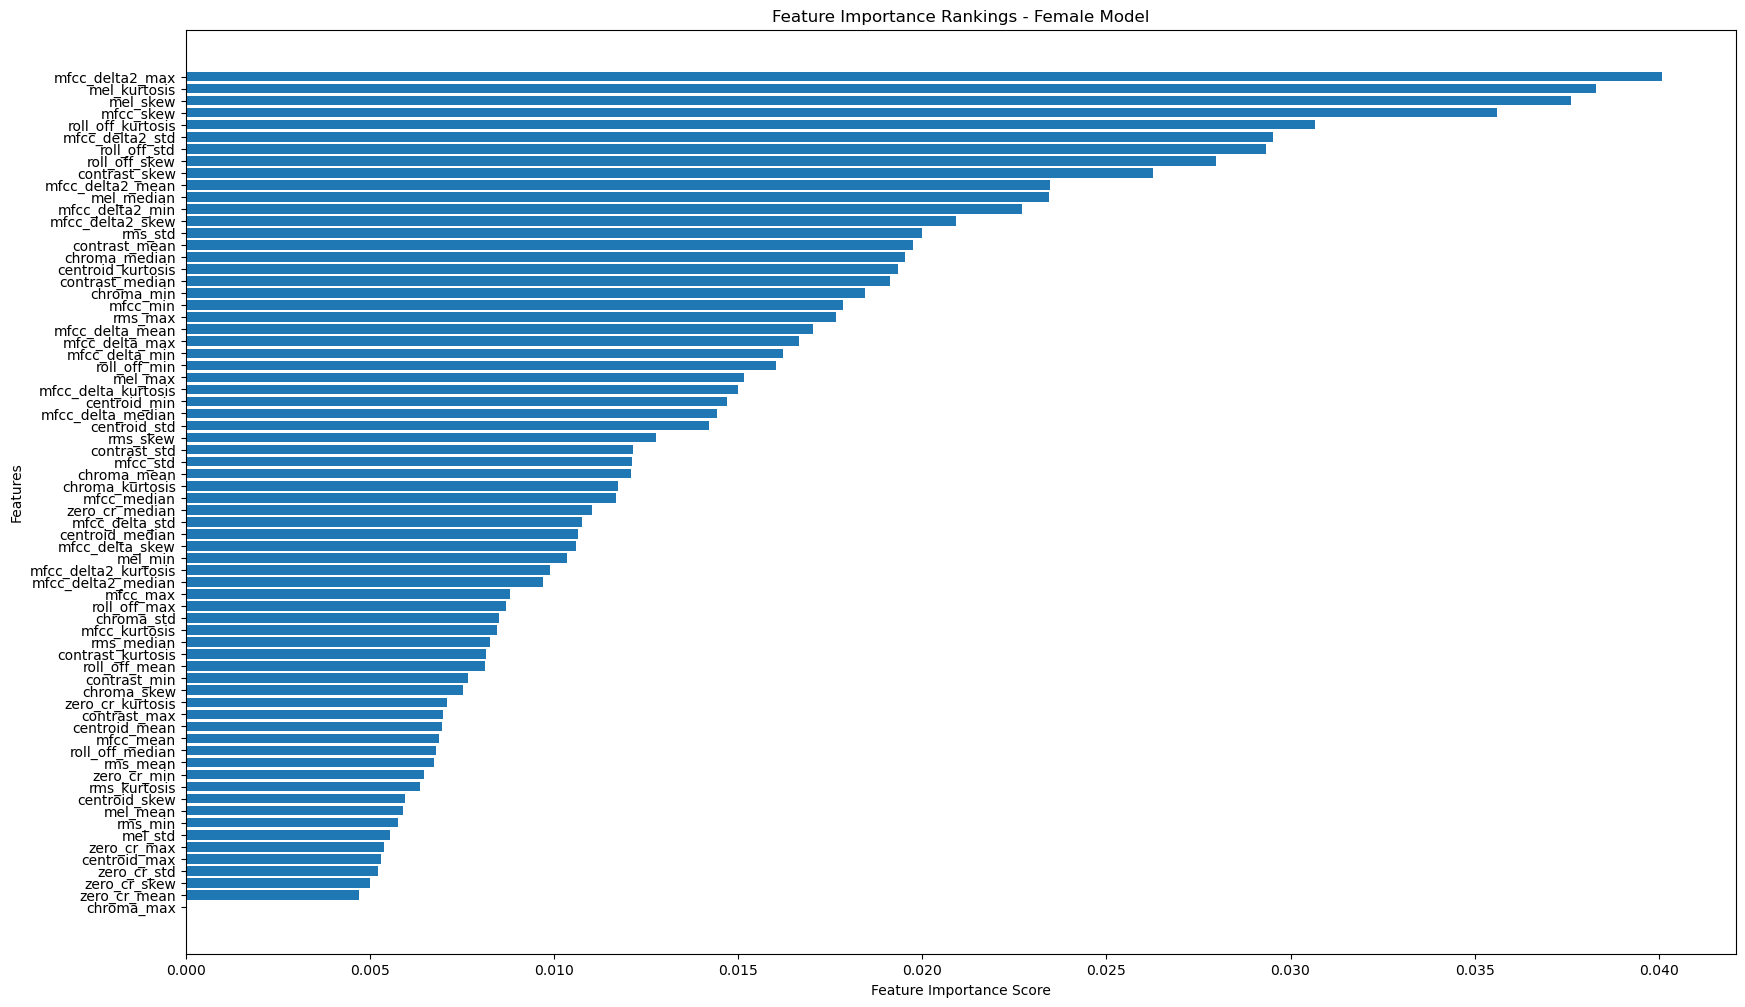

In [74]:
# Plot
features = feature_list
scores_m = feature_importances_male
scores_f = feature_importances_female

# Function to plot feature importances
def plot_feature_importances(scores, title):
    # Combine features with their scores
    feature_scores = list(zip(features, scores))

    # Sort features by importance
    sorted_importances = sorted(feature_scores, key=lambda x: x[1], reverse=True)

    # Extract feature names and scores
    sorted_features = [x[0] for x in sorted_importances]
    sorted_scores = [x[1] for x in sorted_importances]

    # Plot
    plt.figure(figsize=(20, 12))
    plt.barh(sorted_features, sorted_scores)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot for male model
plot_feature_importances(scores_m, 'Feature Importance Rankings - Male Model')

# Plot for female model
plot_feature_importances(scores_f, 'Feature Importance Rankings - Female Model')


## Multi Layer Perception Classifier - new method

In [88]:
# data = pd.read_csv('voice_data_dw.csv')    # normal data, dw = data wrangling
data = pd.read_csv('voice_data_no_trim.csv')     # test data
df = pd.DataFrame(data)
df.head()

filename  modality  vocal_channel  emotion  \
0  03-01-01-01-01-01-01.wav         3              1        1   
1  03-01-01-01-01-02-01.wav         3              1        1   
2  03-01-01-01-02-01-01.wav         3              1        1   
3  03-01-01-01-02-02-01.wav         3              1        1   
4  03-01-02-01-01-01-01.wav         3              1        2   

   voice_intensity  statement  statement_repetition  actor_gender  mfcc_mean  \
0                1          1                     1             1 -13.750966   
1                1          1                     2             1 -14.013200   
2                1          2                     1             1 -13.286643   
3                1          2                     2             1 -13.380160   
4                1          1                     1             1 -14.227764   

    mfcc_max  ...   rms_std  rms_skew  rms_kurtosis  zero_cr_mean  \
0  208.77170  ...  0.002752  0.523488     -0.223807      0.071506   
1  203.44556  ...  0.003002  0.472005     -0.447499      0.063912   
2  212.63199  ...  0.003825  1.126351      0.754771      0.086652   
3  214.31924  ...  0.004013  1.583204      1.841371      0.088229   
4  217.13522  ...  0.002391  1.028021      0.677945      0.082396   

   zero_cr_max  zero_cr_min  zero_cr_median  zero_cr_std  zero_cr_skew  \
0     0.208984     0.023438        0.046875     0.049214      1.349598   
1     0.183105     0.019531        0.048340     0.042300      1.347601   
2     0.424316     0.014648        0.048340     0.091483      2.158822   
3     0.406250     0.013184        0.047852     0.093873      1.803562   
4     0.374512     0.018555        0.047852     0.076891      2.038556   

   zero_cr_kurtosis  
0          0.792986  
1          0.843776  
2          4.017514  
3          2.245144  
4          3.821344  

[5 rows x 78 columns]

In [31]:
df.columns

Index(['mfcc_mean', 'mfcc_max', 'mfcc_min', 'mfcc_median', 'mfcc_std',
       'mfcc_skew', 'mfcc_kurtosis', 'mfcc_delta_mean', 'mfcc_delta_max',
       'mfcc_delta_min', 'mfcc_delta_median', 'mfcc_delta_std',
       'mfcc_delta_skew', 'mfcc_delta_kurtosis', 'mfcc_delta2_mean',
       'mfcc_delta2_max', 'mfcc_delta2_min', 'mfcc_delta2_median',
       'mfcc_delta2_std', 'mfcc_delta2_skew', 'mfcc_delta2_kurtosis',
       'chroma_mean', 'chroma_min', 'chroma_max', 'chroma_median',
       'chroma_std', 'chroma_skew', 'chroma_kurtosis', 'mel_mean', 'mel_max',
       'mel_min', 'mel_median', 'mel_std', 'mel_skew', 'mel_kurtosis',
       'contrast_mean', 'contrast_max', 'contrast_min', 'contrast_median',
       'contrast_std', 'contrast_skew', 'contrast_kurtosis', 'centroid_mean',
       'centroid_max', 'centroid_min', 'centroid_median', 'centroid_std',
       'centroid_skew', 'centroid_kurtosis', 'roll_off_mean', 'roll_off_max',
       'roll_off_min', 'roll_off_median', 'roll_off_std', 'roll_

In [89]:
def emotion_to_string(e):
    if e % 8 == 1:
        return 'neutral'
    elif e % 8 == 2:
        return 'calm'
    elif e % 8 == 3:
        return 'happy'
    elif e % 8 == 4:
        return 'sad'
    elif e % 8 == 5:
        return 'angry'
    elif e % 8 == 6:
        return 'fearful'
    elif e % 8 == 7:
        return 'disgust'
    else:
        return 'surprised'

# Applying the function to the 'emotion' column
df['emotion'] = df['emotion'].apply(emotion_to_string)

In [90]:
# Encoding categorical features (if they are not already encoded)
# For example, if 'actor_gender' is not numerically encoded
df['actor_gender'] = df['actor_gender'].map({1: 0, 2: 1})

male_df = df[df['actor_gender'] == 0]  # Assuming 0 represents male
female_df = df[df['actor_gender'] == 1]  # Assuming 1 represents female

In [91]:
print("Number of samples in male subset:", male_df.shape[0])
print("Number of samples in female subset:", female_df.shape[0])

Number of samples in male subset: 720
Number of samples in female subset: 720


In [97]:
# Creating a pipeline that first applies the StandardScaler and then fits the MLPClassifier
# Best accuracy: 0.6555555555555556
# alpha=0.385, activation='relu', solver='adam', learning_rate_init=0.0006, 
#                           batch_size=163, epsilon=1e-08, hidden_layer_sizes=(300, ), 
#                           learning_rate='constant', max_iter=2000

# 2nd best
# alpha=0.34, activation='relu', solver='adam', learning_rate_init=0.006, 
#                           batch_size=163, epsilon=1e-08, hidden_layer_sizes=(300, ), 
#                           learning_rate='constant', max_iter=1000

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(alpha=0.385, activation='relu', solver='adam', learning_rate_init=0.0006, 
                          batch_size=163, epsilon=1e-08, hidden_layer_sizes=(300, ), 
                          learning_rate='constant', max_iter=2000))
])

# Features to training and testing
feature_list = df.columns[8: ]

# Define features and target for male subset
X_male = male_df[feature_list]
y_male = male_df['emotion']

# Splitting the male dataset
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.25)

# Fit the pipeline to the male data
pipeline.fit(X_train_male, y_train_male)

# Evaluate the model for male subset
y_pred_m = pipeline.predict(X_test_male)
print(confusion_matrix(y_test_male, y_pred_m))
print(classification_report(y_test_male, y_pred_m))

accuracy_m = accuracy_score(y_test_male, y_pred_m)
print("Accuracy:", accuracy_m)

[[19  0  1  4  1  0  0  2]
 [ 0 16  1  2  0  5  0  0]
 [ 0  0 21  1  0  0  2  1]
 [ 0  0  2 11  4  0  0  3]
 [ 2  2  0  1 13  0  2  1]
 [ 0  3  0  1  1  2  0  0]
 [ 1  5  3  1  4  2 10  5]
 [ 1  0  1  3  3  3  0 14]]
              precision    recall  f1-score   support

       angry       0.83      0.70      0.76        27
        calm       0.62      0.67      0.64        24
     disgust       0.72      0.84      0.78        25
     fearful       0.46      0.55      0.50        20
       happy       0.50      0.62      0.55        21
     neutral       0.17      0.29      0.21         7
         sad       0.71      0.32      0.44        31
   surprised       0.54      0.56      0.55        25

    accuracy                           0.59       180
   macro avg       0.57      0.57      0.55       180
weighted avg       0.62      0.59      0.59       180

Accuracy: 0.5888888888888889


In [96]:
# Creating a pipeline that first applies the StandardScaler and then fits the MLPClassifier
# Best accuracy: 0.7166666666666667
# alpha=0.385, activation='relu', solver='adam', learning_rate_init=0.0006, 
#                           batch_size=163, epsilon=1e-08, hidden_layer_sizes=(300, ), 
#                           learning_rate='constant', max_iter=2000

# 2nd best
# alpha=0.34, activation='relu', solver='adam', learning_rate_init=0.006, 
#                           batch_size=163, epsilon=1e-08, hidden_layer_sizes=(300, ), 
#                           learning_rate='constant', max_iter=1000

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(alpha=0.385, activation='relu', solver='adam', learning_rate_init=0.0006, 
                          batch_size=163, epsilon=1e-08, hidden_layer_sizes=(300, ), 
                          learning_rate='constant', max_iter=2000))
])

# Features to training and testing
feature_list = df.columns[8: ]

# Define features and target for male subset
X_female = female_df[feature_list]
y_female = female_df['emotion']

# Splitting the male dataset
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.25)

# Fit the pipeline to the male data
pipeline.fit(X_train_female, y_train_female)

# Evaluate the model for male subset
y_pred_f = pipeline.predict(X_test_female)
print(confusion_matrix(y_test_female, y_pred_f))
print(classification_report(y_test_female, y_pred_f))

accuracy_f = accuracy_score(y_test_female, y_pred_f)
print("Accuracy:", accuracy_f)

[[15  0  4  2  0  1  1  2]
 [ 0 20  0  2  0  1  0  0]
 [ 0  0 15  0  0  1  0  1]
 [ 1  1  2 16  1  0  3  2]
 [ 0  0  1  2 15  1  0  4]
 [ 0  6  1  0  2  3  3  1]
 [ 0  6  2  1  2  4  9  1]
 [ 0  0  2  1  1  1  3 17]]
              precision    recall  f1-score   support

       angry       0.94      0.60      0.73        25
        calm       0.61      0.87      0.71        23
     disgust       0.56      0.88      0.68        17
     fearful       0.67      0.62      0.64        26
       happy       0.71      0.65      0.68        23
     neutral       0.25      0.19      0.21        16
         sad       0.47      0.36      0.41        25
   surprised       0.61      0.68      0.64        25

    accuracy                           0.61       180
   macro avg       0.60      0.61      0.59       180
weighted avg       0.62      0.61      0.60       180

Accuracy: 0.6111111111111112


In [80]:
# from sklearn.model_selection import GridSearchCV   # Took too long, stopped to change parameters and reduce CPU load

# # Define the parameter grid
# param_grid = {
#     'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (50, 100), (100, 50)],
#     'mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'mlp__solver': ['lbfgs', 'sgd', 'adam'],
#     'mlp__alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.3849486],
#     'mlp__learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=5, scoring='accuracy')

# # Fit grid_search to the data
# grid_search.fit(X_train_male, y_train_male)

# # Get the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred_male = best_model.predict(X_test_male)
# print(confusion_matrix(y_test_male, y_pred_male))
# print(classification_report(y_test_male, y_pred_male))


In [81]:
# from sklearn.model_selection import GridSearchCV   # Took too long, stopped to change parameters and reduce CPU load

# # Define the parameter grid
# param_grid = {
#     'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100), (50, 100), (100, 50)],
#     'mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'mlp__solver': ['lbfgs', 'sgd', 'adam'],
#     'mlp__alpha': [0.0001, 0.001, 0.01, 0.1],
#     'mlp__learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
#     'mlp__batch_size': [32, 64, 128, 256],
#     'mlp__max_iter': [200, 400, 800, 1600]
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=5, scoring='accuracy')

# # Fit grid_search to the data
# grid_search.fit(X_train_male, y_train_male)

# # Output the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# # Evaluate the best model
# best_model = grid_search.best_estimator_
# y_pred_male = best_model.predict(X_test_male)
# print(confusion_matrix(y_test_male, y_pred_male))
# print(classification_report(y_test_male, y_pred_male))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(300, )],  # (300, ) was the best (vs. (50, ) through (500, 750))
    'mlp__activation': ['relu'],  # Using 'relu' yielded best results (vs. 'identity', 'logistic', 'tanh')
    'mlp__solver': ['sgd', 'adam'],  # Using 'sgd' yielded best results (vs. 'lbfgs', 'adam')
    'mlp__alpha': [0.3],  # 0.6 was the best from multiple similar tests
    'mlp__learning_rate_init': [0.0006],  # 0.0212 was best
    'mlp__batch_size': [163],  # 163, was best
    'mlp__max_iter': [1000]  # 1000 best for max_iter
}

# Creating a pipeline that first applies the StandardScaler and then fits the MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(alpha=0.3, activation='relu', solver='adam', 
                                 learning_rate_init=0.0006, batch_size=163, epsilon=1e-08,
                                 hidden_layer_sizes=(300, ), learning_rate='constant', max_iter=1000))
])

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, n_jobs=-1, cv=3, scoring='accuracy')

# Fit grid_search to the data
grid_search.fit(X_train_male, y_train_male)

# Output the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_male = best_model.predict(X_test_male)
print(confusion_matrix(y_test_male, y_pred_male))
print(classification_report(y_test_male, y_pred_male))

# adjust to best params, vary then test again

### RandomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Expanded parameter grid  # Best Score: 0.5277777777777778 with below settings in comments
param_distributions = {
    'mlp__hidden_layer_sizes': [(300,), (500, 100), (300, 50)],  # best is (300, ) ((300,), (500, 100), (300, 50))
    'mlp__activation': ['identity', 'relu'],  # best is 'relu' ('identity', 'relu')
    'mlp__solver': ['adam', 'lbfgs'],  # best is 'adam' ('adam', 'lbfgs')
    'mlp__alpha': np.linspace(0.001, 1.5, 5),    # best is 0.33411111111111114 (0.001, 1.5, 10)
    'mlp__learning_rate_init': np.linspace(0.0005, 0.8, 5),    # best is 0.0005 (0.0005, 0.8, 10)
    'mlp__batch_size': [50, 163, 182],    # best is 163 (25, 50, 163)
    'mlp__max_iter': [1000]    # best is 2500 (1000, 2000, 2500)
}

# Creating a pipeline that first applies the StandardScaler and then fits the MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(alpha=0.3, activation='relu', solver='adam', 
                                 learning_rate_init=0.0006, batch_size=163, epsilon=1e-08,
                                 hidden_layer_sizes=(300, ), learning_rate='constant', max_iter=1000))
])

# Create GridSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, n_jobs=-1, cv=3, scoring='accuracy', random_state=21)

# Fit grid_search to the data
random_search.fit(X_train_male, y_train_male)

# Output the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred_male = best_model.predict(X_test_male)
print(confusion_matrix(y_test_male, y_pred_male))
print(classification_report(y_test_male, y_pred_male))

## Multi Layer Perception Classifier - old method adapted

In [3]:
# Extended feature extraction function
def extract_feature(signal, sample_rate, mfcc, chroma, mel, contrast, centroid, roll_off, bandwidth, energy, rms, delta_mfccs, delta2_mfccs):
    X = signal
    if chroma or centroid or roll_off or bandwidth:
        stft = np.abs(librosa.stft(X))
    
    result = np.array([])

    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))

        if delta_mfccs:
            if mfccs.shape[0] > 1:  # Check if there are enough frames
                delta_mfccs = np.mean(librosa.feature.delta(mfccs).T, axis=0)
                result = np.hstack((result, delta_mfccs)) 
            else:
                # Handle the case where there are not enough frames
                # For example, append zeros or handle it as required
                pass

        if delta2_mfccs:
            if mfccs.shape[0] > 1:  # Check if there are enough frames
                delta2_mfccs = np.mean(librosa.feature.delta(mfccs, order=2).T, axis=0)
                result = np.hstack((result, delta2_mfccs)) 
            else:
                # Handle the case where there are not enough frames
                # For example, append zeros or handle it as required
                pass
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel))
    if contrast:
        contrast = np.mean(librosa.feature.spectral_contrast(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, contrast))
    if centroid:
        centroid = np.mean(librosa.feature.spectral_centroid(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, centroid))
    if roll_off:
        roll_off = np.mean(librosa.feature.spectral_rolloff(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, roll_off))
    if bandwidth:
        bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, bandwidth))
    if energy:
        energy = np.array([np.sum(np.square(X))])
        result = np.hstack((result, energy))
    if rms:
        rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
        result = np.hstack((result, rms))

    return result

In [15]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
# observed_emotions=['calm', 'happy', 'fearful', 'disgust']
# observed_emotions=['calm', 'happy', 'sad', 'angry', 'fearful', 'disgust']
# observed_emotions=['calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
observed_emotions=['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

In [7]:
# # load, segment and process data
# def load_data(test_size=0.2, mfcc=True, delta_mfccs=True, delta2_mfccs=True, chroma=True, mel=True, contrast=False, centroid=False, roll_off=False, bandwidth=False, energy=False, rms=True):
#     X_male, y_male = [], []
#     X_female, y_female = [], []
#     for file in glob.glob(f'{sound_path}/ravdess-data/Actor_*/*.wav'):
#         file_name = os.path.basename(file)
#         emotion = emotions[file_name.split("-")[2]]
#         actor_number = int(file_name.split("-")[-1].split(".")[0])  # Extract actor number from filename

#         if emotion not in observed_emotions:
#             continue

#         # Load the audio file
#         signal, sample_rate = librosa.load(file, sr=None)

#         # Remove silent parts
#         non_silent_intervals = librosa.effects.split(signal, top_db=30)  # top_db can be adjusted
#         non_silent_signal = np.concatenate([signal[start:end] for start, end in non_silent_intervals])

#         # Split the signal into 3 segments
#         segments = np.array_split(non_silent_signal, 2)

#         for segment in segments:
#             # Extract features from each segment
#             feature = extract_feature(segment, sample_rate, mfcc=mfcc, chroma=chroma, mel=mel, contrast=contrast, centroid=centroid, roll_off=roll_off, bandwidth=bandwidth, energy=energy, rms=rms, delta_mfccs=delta_mfccs, delta2_mfccs=delta2_mfccs)
#             if actor_number % 2 == 0:  # Female actors have even numbers
#                 X_female.append(feature)
#                 y_female.append(emotion)
#             else:  # Male actors have odd numbers
#                 X_male.append(feature)
#                 y_male.append(emotion)

#     # Splitting the datasets into train and test sets
#     X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(np.array(X_male), y_male, test_size=test_size, random_state=42)
#     X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(np.array(X_female), y_female, test_size=test_size, random_state=42)

#     return (X_train_male, X_test_male, y_train_male, y_test_male), (X_train_female, X_test_female, y_train_female, y_test_female)


In [5]:
# load, segment and process data
def load_data(test_size=0.2, mfcc=True, delta_mfccs=True, delta2_mfccs=True, chroma=True, mel=True, contrast=False, centroid=False, roll_off=False, bandwidth=False, energy=False, rms=True):
    X_male, y_male = [], []
    X_female, y_female = [], []
    for file in glob.glob(f'{sound_path}/ravdess-data/Actor_*/*.wav'):
        file_name = os.path.basename(file)
        emotion = emotions[file_name.split("-")[2]]
        actor_number = int(file_name.split("-")[-1].split(".")[0])  # Extract actor number from filename

        if emotion not in observed_emotions:
            continue

        # Load the audio file
        signal, sample_rate = librosa.load(file, sr=None)

        # Remove silent parts
        non_silent_intervals = librosa.effects.split(signal, top_db=30)  # top_db can be adjusted
        non_silent_signal = np.concatenate([signal[start:end] for start, end in non_silent_intervals])

        # Extract features from the entire non-silent signal
        feature = extract_feature(non_silent_signal, sample_rate, mfcc=mfcc, chroma=chroma, mel=mel, contrast=contrast, centroid=centroid, roll_off=roll_off, bandwidth=bandwidth, energy=energy, rms=rms, delta_mfccs=delta_mfccs, delta2_mfccs=delta2_mfccs)
        if actor_number % 2 == 0:  # Female actors have even numbers
            X_female.append(feature)
            y_female.append(emotion)
        else:  # Male actors have odd numbers
            X_male.append(feature)
            y_male.append(emotion)

    # Splitting the datasets into train and test sets
    X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(np.array(X_male), y_male, test_size=test_size)
    X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(np.array(X_female), y_female, test_size=test_size)

    return (X_train_male, X_test_male, y_train_male, y_test_male), (X_train_female, X_test_female, y_train_female, y_test_female)


In [6]:
# from sklearn.decomposition import PCA      # performance suffered with PCA, removed

# Split the datasets into male and female parts
(X_train_male, X_test_male, y_train_male, y_test_male), (X_train_female, X_test_female, y_train_female, y_test_female) = load_data(test_size=0.25)

# Initialize separate scalers for male and female datasets
scaler_male = StandardScaler()
scaler_female = StandardScaler()

# Scale the male datasets
X_train_male_scaled = scaler_male.fit_transform(X_train_male)
X_test_male_scaled = scaler_male.transform(X_test_male)

# Scale the female datasets
X_train_female_scaled = scaler_female.fit_transform(X_train_female)
X_test_female_scaled = scaler_female.transform(X_test_female)

In [7]:
# Get the shape of the regular training and testing datasets
print((X_train_male.shape[0], X_test_male.shape[0]))
print((X_train_female.shape[0], X_test_female.shape[0]))

(540, 180)
(540, 180)


In [8]:
# Get the shape of the Scaled training and testing datasets
print((X_train_male_scaled.shape[0], X_test_male.shape[0]))
print((X_train_female_scaled.shape[0], X_test_female.shape[0]))

(540, 180)
(540, 180)


In [9]:
# Get the number of regular features extracted
print(f'Features extracted: {X_train_male.shape[1]}')
print(f'Features extracted: {X_train_female.shape[1]}')

Features extracted: 183
Features extracted: 183


In [10]:
# Get the number of Scaled features extracted
print(f'Features extracted: {X_train_male_scaled.shape[1]}')
print(f'Features extracted: {X_train_female_scaled.shape[1]}')

Features extracted: 183
Features extracted: 183


#### Modeling, fitting and predicting male, female, male scaled, and female scaled

In [15]:
# # Initialize the Multi Layer Perceptron Classifier      # old parameters
# model_male=MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 500)
# model_female=MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 500)
# model_male_scaled=MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 500)
# model_female_scaled=MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08, hidden_layer_sizes = (300,), learning_rate = 'adaptive', max_iter = 500)

In [7]:
# Initialize the Multi Layer Perceptron Classifier  
# Best results: Accuracy of male: 68.89%, Accuracy of female: 68.33%
#               Accuracy of male scaled: 71.11%, Accuracy of female scaled: 78.33%
# alpha=0.385, activation='relu', solver='adam', 
#                                  learning_rate_init=0.0006, batch_size=163, epsilon=1e-08,
#                                  hidden_layer_sizes=(300, ), learning_rate='constant', max_iter=4000
model_male=MLPClassifier(alpha=0.385, activation='relu', solver='adam', 
                                 learning_rate_init=0.0006, batch_size=163, epsilon=1e-08,
                                 hidden_layer_sizes=(300, ), learning_rate='constant', max_iter=2000)
model_female=MLPClassifier(alpha=0.385, activation='relu', solver='adam', 
                                 learning_rate_init=0.0006, batch_size=163, epsilon=1e-08,
                                 hidden_layer_sizes=(300, ), learning_rate='constant', max_iter=2000)
model_male_scaled=MLPClassifier(alpha=0.385, activation='relu', solver='adam', 
                                 learning_rate_init=0.0006, batch_size=163, epsilon=1e-08,
                                 hidden_layer_sizes=(300, ), learning_rate='constant', max_iter=2000)
model_female_scaled=MLPClassifier(alpha=0.385, activation='relu', solver='adam', 
                                 learning_rate_init=0.0006, batch_size=163, epsilon=1e-08,
                                 hidden_layer_sizes=(300, ), learning_rate='constant', max_iter=2000)

In [8]:
# Train the model      # performance suffered with PCA, removed
model_male.fit(X_train_male, y_train_male)
model_female.fit(X_train_female, y_train_female)
model_male_scaled.fit(X_train_male_scaled, y_train_male)
model_female_scaled.fit(X_train_female_scaled, y_train_female)

MLPClassifier(alpha=0.385, batch_size=163, hidden_layer_sizes=(300,),
              learning_rate_init=0.0006, max_iter=2000)

In [9]:
# Predict for the test set      # performance suffered with PCA, removed
y_pred_m = model_male.predict(X_test_male)
y_pred_f = model_female.predict(X_test_female)
y_pred_m_sc = model_male_scaled.predict(X_test_male_scaled)
y_pred_f_sc = model_female_scaled.predict(X_test_female_scaled)

In [10]:
# Calculate the accuracy of our model      # performance suffered with PCA, removed
accuracy_m = accuracy_score(y_true = y_test_male, y_pred = y_pred_m)
accuracy_f = accuracy_score(y_true = y_test_female, y_pred = y_pred_f)
accuracy_m_sc = accuracy_score(y_true = y_test_male, y_pred = y_pred_m_sc)
accuracy_f_sc = accuracy_score(y_true = y_test_female, y_pred = y_pred_f_sc)

# Print the accuracy
print("Accuracy of male: {:.2f}%".format(accuracy_m*100))
print("Accuracy of female: {:.2f}%".format(accuracy_f*100))
print("Accuracy of male scaled: {:.2f}%".format(accuracy_m_sc*100))
print("Accuracy of female scaled: {:.2f}%".format(accuracy_f_sc*100))

Accuracy of male: 62.50%
Accuracy of female: 67.86%
Accuracy of male scaled: 71.43%
Accuracy of female scaled: 77.98%


#### Cross-Validation

In [11]:
# Perform 10-fold cross-validation
cv_scores_m = cross_val_score(model_male, X_train_male, y_train_male, cv=10, n_jobs=-1)

# Output the average score from cross-validation
print(f'Average CV Score for male: {np.mean(cv_scores_m)}')

Average CV Score for male: 0.6467843137254902


In [12]:
# Perform 10-fold cross-validation
cv_scores_f = cross_val_score(model_female, X_train_female, y_train_female, cv=10, n_jobs=-1)

# Output the average score from cross-validation
print(f'Average CV Score for female: {np.mean(cv_scores_f)}')

Average CV Score for female: 0.6707450980392158


In [13]:
# Perform 10-fold cross-validation
cv_scores_m_sc = cross_val_score(model_male_scaled, X_train_male_scaled, y_train_male, cv=10, n_jobs=-1)

# Output the average score from cross-validation
print(f'Average CV Score for scaled male: {np.mean(cv_scores_m_sc)}')

Average CV Score for scaled male: 0.7003137254901961


In [14]:
# Perform 10-fold cross-validation
cv_scores_f_sc = cross_val_score(model_female_scaled, X_train_female_scaled, y_train_female, cv=10, n_jobs=-1)

# Output the average score from cross-validation
print(f'Average CV Score for scaled female: {np.mean(cv_scores_f_sc)}')

Average CV Score for scaled female: 0.7261176470588235


### Bootstrapping

#### Just split male

Average Accuracy for males: 65.39%

Example Classification Report:
              precision    recall  f1-score   support

       angry       0.70      0.79      0.75        24
        calm       0.89      0.96      0.93        26
     disgust       0.54      0.67      0.60        21
     fearful       0.73      0.31      0.44        35
       happy       0.65      0.71      0.68        21
         sad       0.43      0.62      0.51        16
   surprised       0.73      0.76      0.75        25

    accuracy                           0.67       168
   macro avg       0.67      0.69      0.66       168
weighted avg       0.69      0.67      0.66       168


Example Confusion Matrix:
[[19  1  1  0  1  1  1]
 [ 0 25  1  0  0  0  0]
 [ 4  1 14  0  0  0  2]
 [ 3  0  5 11  5  8  3]
 [ 0  0  1  2 15  2  1]
 [ 1  1  2  1  1 10  0]
 [ 0  0  2  1  1  2 19]]


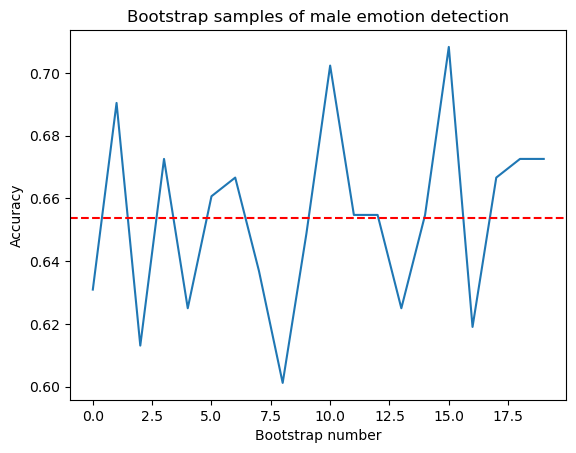

In [13]:
# Number of bootstrap samples
n_iterations = 20

# Array to store scores
classification_reports_m = []
confusion_matrices_m = []

# Define the pipeline   # Best average: 65.00%   alpha=0.3849486, activation='relu', solver='lbfgs', batch_size=163,
#                                                hidden_layer_sizes=(1283,),learning_rate='constant', max_iter=2000
                                                 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(alpha=0.385, activation='relu', solver='adam', 
                                 learning_rate_init=0.0006, batch_size=163, epsilon=1e-08,
                                 hidden_layer_sizes=(300, ), learning_rate='constant', max_iter=2000, random_state=42))
])

for i in range(n_iterations):
    # Prepare bootstrap sample
    X_train_boot_m, y_train_boot_m = resample(X_train_male, y_train_male)

    # Fit the pipeline on the bootstrap sample
    pipeline.fit(X_train_boot_m, y_train_boot_m)

    # Evaluate the model on the original test set
    y_pred_m = pipeline.predict(X_test_male)
    report_m = classification_report(y_test_male, y_pred_m, output_dict=True)
    matrix_m = confusion_matrix(y_test_male, y_pred_m)

    classification_reports_m.append(report_m)
    confusion_matrices_m.append(matrix_m)

# Calculate average performance from classification reports
average_performance_m = np.mean([report_m['accuracy'] for report_m in classification_reports_m])
print(f'Average Accuracy for males: {average_performance_m * 100:.2f}%')

# Print out an example classification report and confusion matrix
print("\nExample Classification Report:")
print(classification_report(y_test_male, pipeline.predict(X_test_male)))

print("\nExample Confusion Matrix:")
print(confusion_matrix(y_test_male, pipeline.predict(X_test_male)))

# Plot results
plt.plot([report_m['accuracy'] for report_m in classification_reports_m])
plt.axhline(y=average_performance_m, color='r', linestyle='--')
plt.xlabel('Bootstrap number')
plt.ylabel('Accuracy')
plt.title('Bootstrap samples of male emotion detection')
plt.show()

#### Just split female

Average Accuracy for females: 71.13%

Example Classification Report:
              precision    recall  f1-score   support

       angry       0.91      0.80      0.85        25
        calm       0.91      0.88      0.90        34
     disgust       0.60      0.71      0.65        21
     fearful       0.58      0.54      0.56        26
       happy       0.65      0.59      0.62        22
         sad       0.56      0.70      0.62        20
   surprised       0.74      0.70      0.72        20

    accuracy                           0.71       168
   macro avg       0.71      0.70      0.70       168
weighted avg       0.72      0.71      0.72       168


Example Confusion Matrix:
[[20  0  0  2  1  0  2]
 [ 0 30  2  0  0  2  0]
 [ 1  1 15  1  2  1  0]
 [ 1  0  1 14  2  7  1]
 [ 0  0  3  5 13  0  1]
 [ 0  2  1  2  0 14  1]
 [ 0  0  3  0  2  1 14]]


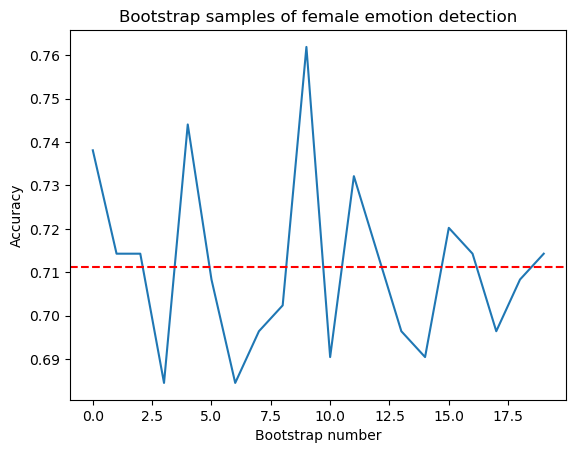

In [14]:
# Number of bootstrap samples
n_iterations = 20

# Array to store scores
classification_reports_f = []
confusion_matrices_f = []

# Define the pipeline   # Best average: 65.00%   alpha=0.3849486, activation='relu', solver='lbfgs', batch_size=163,
#                                                hidden_layer_sizes=(1283,),learning_rate='constant', max_iter=2000
                                                 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(alpha=0.385, activation='relu', solver='adam', 
                                 learning_rate_init=0.0006, batch_size=163, epsilon=1e-08,
                                 hidden_layer_sizes=(300, ), learning_rate='constant', max_iter=2000, random_state=42))
])

for i in range(n_iterations):
    # Prepare bootstrap sample
    X_train_boot_f, y_train_boot_f = resample(X_train_female, y_train_female)

    # Fit the pipeline on the bootstrap sample
    pipeline.fit(X_train_boot_f, y_train_boot_f)

    # Evaluate the model on the original test set
    y_pred_f = pipeline.predict(X_test_female)
    report_f = classification_report(y_test_female, y_pred_f, output_dict=True)
    matrix_f = confusion_matrix(y_test_female, y_pred_f)

    classification_reports_f.append(report_f)
    confusion_matrices_f.append(matrix_f)

# Calculate average performance from classification reports
average_performance_f = np.mean([report_f['accuracy'] for report_f in classification_reports_f])
print(f'Average Accuracy for females: {average_performance_f * 100:.2f}%')

# Print out an example classification report and confusion matrix
print("\nExample Classification Report:")
print(classification_report(y_test_female, pipeline.predict(X_test_female)))

print("\nExample Confusion Matrix:")
print(confusion_matrix(y_test_female, pipeline.predict(X_test_female)))

# Plot results
plt.plot([report_f['accuracy'] for report_f in classification_reports_f])
plt.axhline(y=average_performance_f, color='r', linestyle='--')
plt.xlabel('Bootstrap number')
plt.ylabel('Accuracy')
plt.title('Bootstrap samples of female emotion detection')
plt.show()

#### RandomSearch split male

Average Accuracy for males: 63.12%


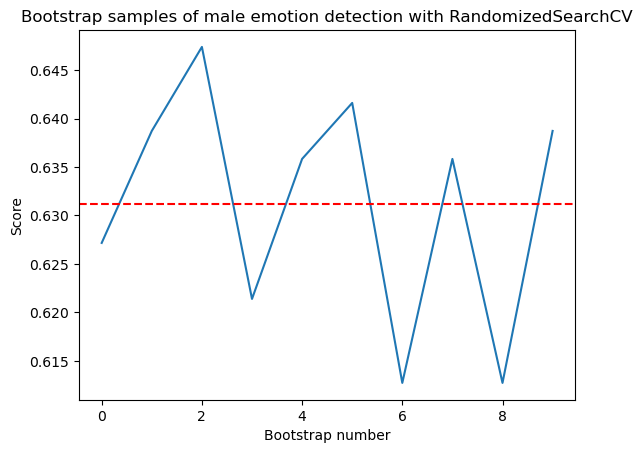

In [8]:
# Number of samples
n_iterations = 10

# Array to store scores
scores_m = []

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier())
])

# Define the parameter space for RandomizedSearchCV
param_distributions = {
    'classifier__solver': ['adam', 'lbfgs']
    'classifier__alpha': [0.3, 0.34, 0.385],
    'classifier__batch_size': [64, 163, 256],
    'classifier__hidden_layer_sizes': [(100,), (200,), (300,)],
    'classifier__learning_rate': ['constant', 'adaptive'],
    'classifier__learning_rate_init': [0.0006]
    'classifier__epsilon': [1e-08]
    'classifier__max_iter': [2000]
}

# Initialize RandomizedSearchCV with n_jobs=-1 to use all processors
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=3, random_state=42, n_jobs=-1)

for i in range(n_iterations):
    # Prepare bootstrap sample
    X_train_boot, y_train_boot = resample(X_train_male, y_train_male)

    # Use RandomizedSearchCV on the bootstrap sample
    random_search.fit(X_train_boot, y_train_boot)

    # Get the best model
    best_model = random_search.best_estimator_

    # Evaluate the best model on the original test set
    y_pred_m = best_model.predict(X_test_male)
    score_m = accuracy_score(y_test_male, y_pred_m)
    scores_m.append(score_m)

# Calculate average performance
average_performance_m = np.mean(scores_m)
print(f'Average Accuracy for males: {average_performance_m * 100:.2f}%')

# Plot results
plt.plot(scores_m)
plt.axhline(y=average_performance_m, color='r', linestyle='--')
plt.xlabel('Iteration number')
plt.ylabel('Score')
plt.title('Samples of male emotion detection with RandomizedSearchCV')
plt.show()

In [22]:
# pip install -y tensorflow==2.12


In [23]:
# import sys
# import tensorflow.keras
# import tensorflow as tf
# import numpy as np

# print(f"Tensor Flow Version: {tf.__version__}")
# print(f"Keras Version: {tensorflow.keras.__version__}")
# print()
# print(f"Python {sys.version}")
# gpu = len(tf.config.list_physical_devices('GPU'))>0
# print("GPU is", "available" if gpu else "NOT AVAILABLE")

In [24]:
# pip install tensorflow[and-cuda]

In [16]:
# Exporting to CSV file
df.to_csv('voice_data_eda.csv', index=False)